## About data : 
+ This data is about churn rate of customers in Telecom company, an input in customer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling.

## Problem Statement : 
+ Our main objective is to create a ML Model to classify the customer churns and analyse why customers are leaving or why they are keep serving. Knowing the reason will enable us to devise strategies to prevent customer churn in the future. 

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Important libraries</p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import skew
from sklearn import preprocessing
import scipy.stats
from scipy.stats import chi2
from termcolor import colored, cprint
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier ,BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from numpy import mean,std
import xgboost as xgb
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from pprint import pprint
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Stop warnings
import warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
### <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">1. Importing the Dataset</p>

In [2]:
Data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Header information of Data

In [3]:
Data.shape

(7043, 21)

+ Dataset contains total 21 columns including 1 dependent and the 20 independent columns
+ Total 7043 rows are in the dataset 

In [4]:
Data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

+ This is structured data as it is in the form of tabular format

### Counts of non-null data and their types within the attributes

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Target Variable of the data

In [6]:
attributes = Data.keys()
attributes[-1]

'Churn'

### Attributes of the data

In [7]:
attributes[:-1]

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2. Data Cleaning</p>

## Typecasting of the data attributes in their appropriate format

In [8]:
Data['SeniorCitizen'].replace(to_replace=[0,1],value=['No','Yes'],inplace=True) 
Data["TotalCharges"] = pd.to_numeric(Data["TotalCharges"],errors="coerce")
Data["tenure"] = pd.to_numeric(Data["tenure"],errors="coerce")

# (a) Removing duplicated values

+ This can create redundancy in the data
+ Checking and removing duplicate Values

In [9]:
Data.duplicated().sum()

0

+ There is no duplicated data

# (b) Dealing with Missing Data

In [10]:
Data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

+ The Dataset shows 11 missing datapoints for Total Charges 

## Method 1 : Replacing the attribute value by the mean or the median

### Step I : Checking the distribution of the Total Charges

Text(0.5, 1.0, 'Histogram plot of TotalCharges with \nskewness : 0.96, Positively Skewed')

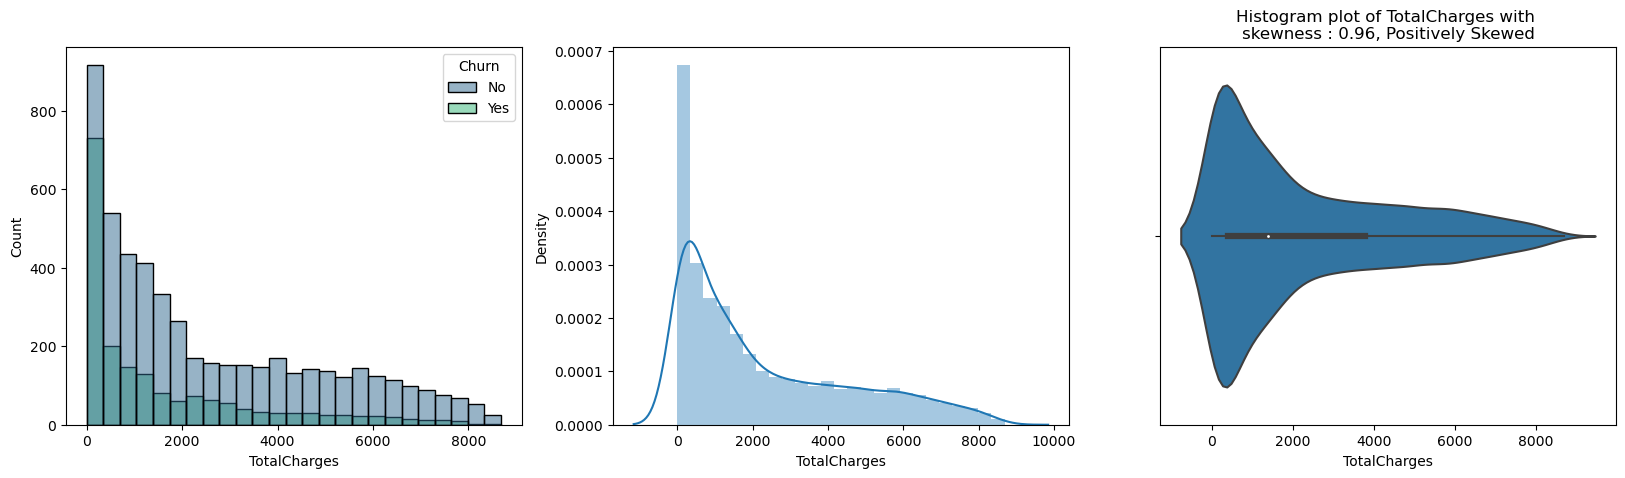

In [11]:
from scipy.stats import skew
from sklearn import preprocessing

def Skewness(Skw):
    if Skw>0:
        return "Positively Skewed"
    else:
        return "Negatively Skewed"
 
# Instead of dropping NaN data we will consider it as zero so that it can't alter the median of the data
dataset1 = Data.copy()    
dataset1['TotalCharges'] = dataset1['TotalCharges'].replace(np.nan,0)

var = 'TotalCharges'
plt.figure(figsize=(20,5),dpi=100)
plt.subplot(1,3,1)
sns.histplot(data=dataset1,x = f'{var}',hue='Churn',palette='viridis')
plt.subplot(1,3,2)
sns.distplot(dataset1[f'{var}'])
Skw = (skew(dataset1[f'{var}'], axis=0, bias=True))
plt.subplot(1,3,3)
sns.violinplot(dataset1[f'{var}'])
plt.title(f'''Histogram plot of {var} with 
skewness : {np.round(Skw,2)}, {Skewness(Skw)}''')

+ Hence dstribution of the 'TotalCharges' is positively skewed so we need to replace the NaN values by the median of the total charges.

### Step II : Replacing the NaN values by the median of the total charges

In [12]:
Med = np.median(dataset1['TotalCharges'])
dataset2 = Data.copy()
dataset2['TotalCharges'] = dataset2['TotalCharges'].replace(np.nan, Med)

### Rechecking null datasets

In [13]:
dataset2.isnull().sum().sum()

0

### Note : 
+ Replacing just by median here is not meaningful because it depends on other 19 attributes ( Since Customer ID is not relevant attribute here) also so the inference-based approach will be best in this case. 

## Method 2 : Inference - based approach Decision tree 

### Step I : Identifying features and the target variable

In [14]:
dataset3 = Data.copy()
dataset3 = dataset3.dropna().reset_index(drop=True)
Target   = dataset3['TotalCharges']
Target = pd.DataFrame(Target)

In [15]:
dataset3.drop('TotalCharges', axis=1, inplace=True)
dataset3.drop('customerID', axis=1, inplace=True)
dataset3.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

### Step II : One hot encoding all feature columns

In [16]:
Columns = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(len(Columns)):
    var = str(Columns[i])
    Encoded = le.fit_transform(dataset3[f'{var}'])
    dataset3[f'{var}'] = Encoded
X1 = np.array(dataset3)

### Step III : Splitting the dataset into training and test sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Target, test_size = 0.20, random_state = 1)

### Step IV : Decision Tree regression

In [18]:
# Importing library for Decision Tree regression
from sklearn.tree import DecisionTreeRegressor as DTR
regressor = DTR(random_state=0)

# Fitting the data in Decision tree formula
regressor.fit(X_train, y_train)

# Predicting test sets results 
y_pred = regressor.predict(X_test)

### Accuracy of the Regression Model

Accuracy : 100.0 %
Error Rate : 0.0 %


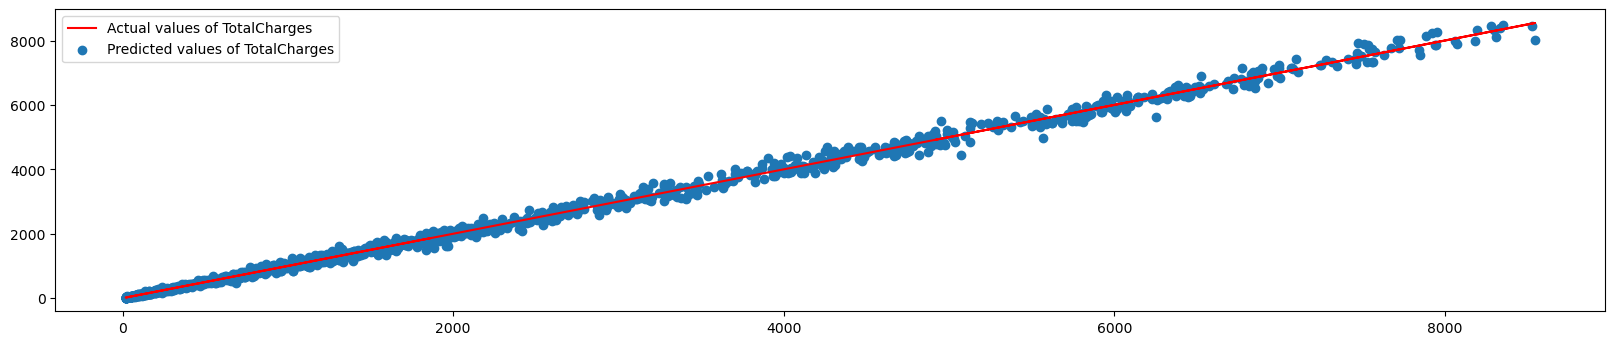

In [19]:
print('Accuracy :',100*np.round(r2_score(y_test, y_pred),2),'%')
print('Error Rate :',100-100*np.round(r2_score(y_test, y_pred),2),'%')

plt.figure(figsize=(20,4),dpi=100)
plt.plot(y_test, y_test,label = 'Actual values of TotalCharges',color='red') 
plt.scatter(y_test, y_pred,label = 'Predicted values of TotalCharges')
plt.legend()

+ Accuracy of the regression model was found 100%

### Step V : Doing Regression for the Target values for the customers having NaN as Target values

In [20]:
dataset4 = Data.copy()
dataset4.drop('TotalCharges', axis=1, inplace=True)
dataset4.drop('customerID', axis=1, inplace=True)

for i in range(len(Columns)):
    var = str(Columns[i])
    Encoded = le.fit_transform(dataset4[f'{var}'])
    dataset4[f'{var}'] = Encoded
X_test2 = np.array(dataset4)

# Predicting the results 
y_pred = regressor.predict(X_test2)

# Updating the Target values in original dataset
dataset5 = Data.copy()
dataset5.drop('customerID', axis=1, inplace=True)
dataset5['TotalCharges'] = y_pred

# Rechecking the missing values
dataset5.isnull().sum().sum()

0

## Final dataset with no missing values

In [21]:
Data = dataset5.copy()

# (c). Visualization of the data

### Measuring Central Tendency of the data

In [22]:
Data.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.474783
std      24.559481       30.090047   2267.973079
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    394.475000
50%      29.000000       70.350000   1396.000000
75%      55.000000       89.850000   3793.525000
max      72.000000      118.750000   8684.800000

## Histogram Plot

### 1. Data visualization using barplots for the categorical attributes

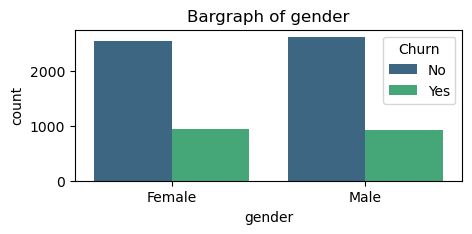

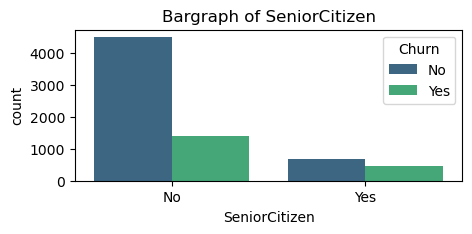

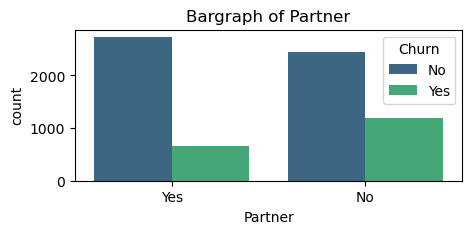

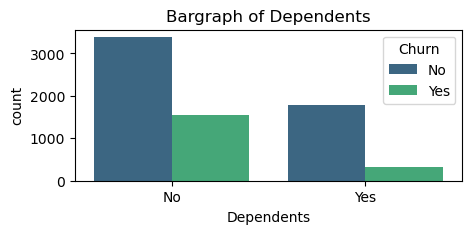

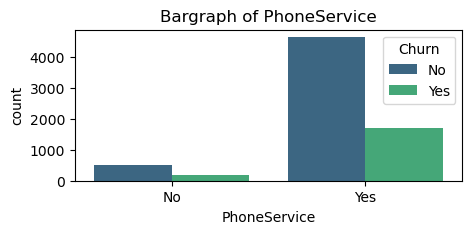

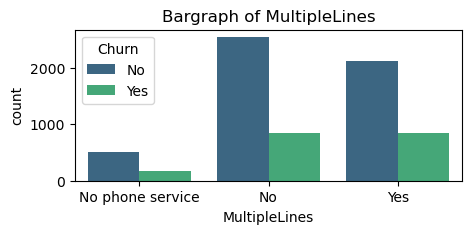

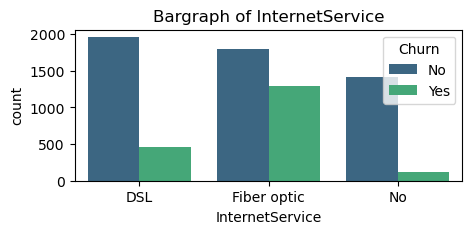

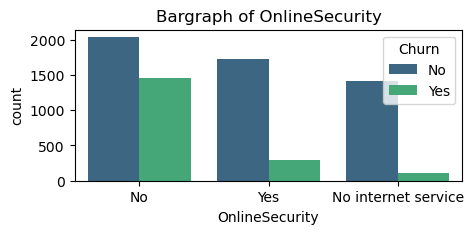

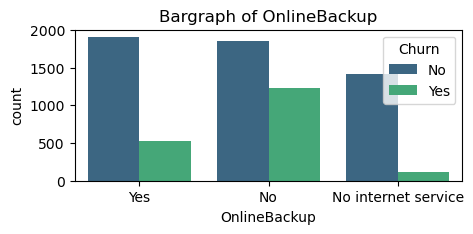

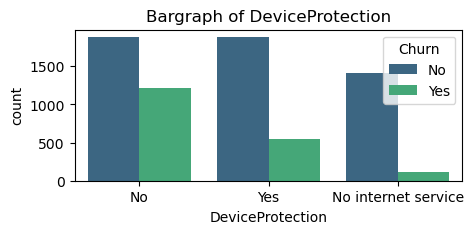

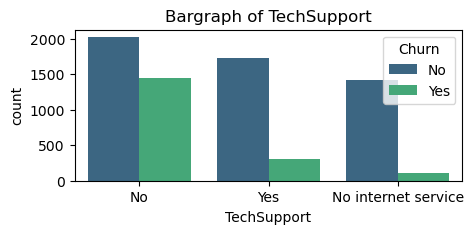

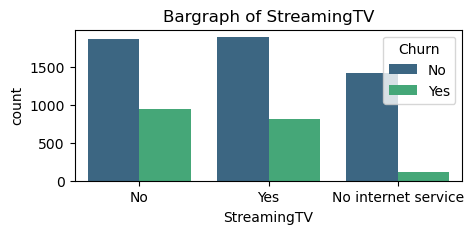

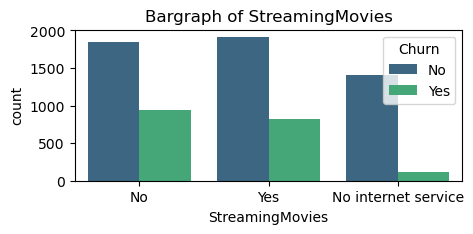

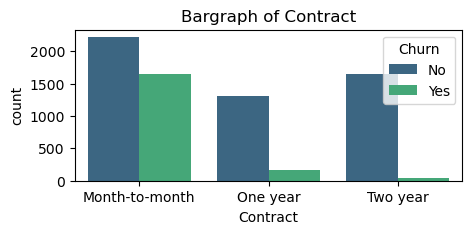

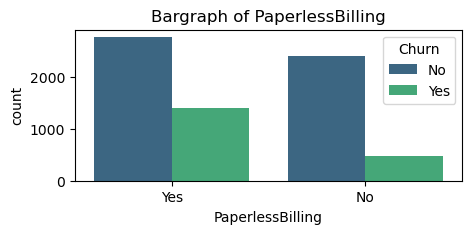

In [23]:
attribute_Categorical = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                         'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 
                         'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

def Histogramplot1(attribute,Data):
    for i in range(len(attribute)-1):
        var = str(attribute[i])
        plt.figure(figsize=(5,2),dpi=100)
        sns.countplot(data=Data,x = f'{var}',hue='Churn',palette='viridis')
        plt.title(f'Bargraph of {var}')
        
Histogramplot1(attribute_Categorical,Data)

### 2. Data visualization using histogram plots for numerical attributes

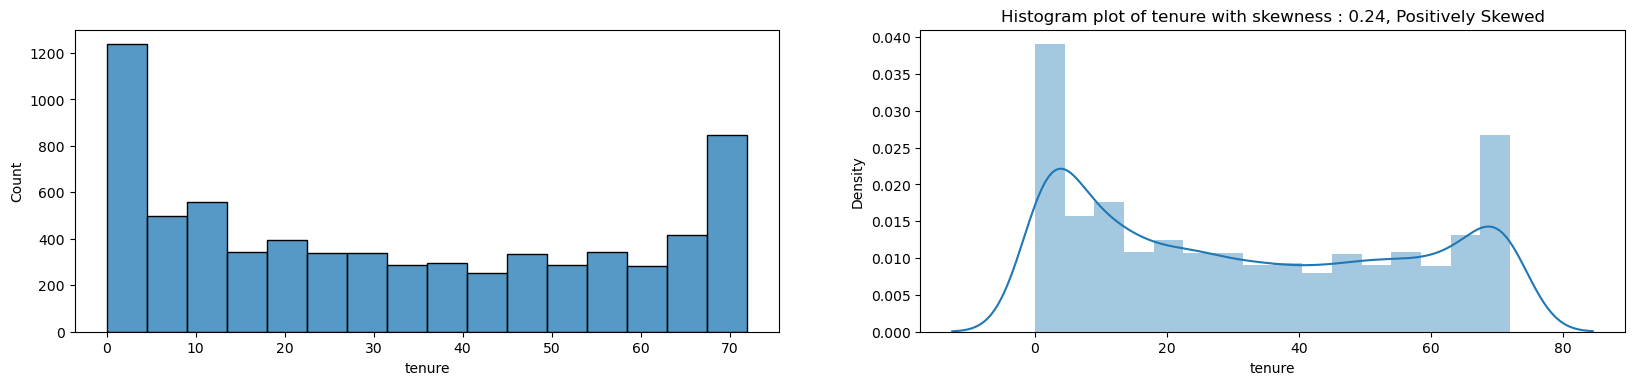

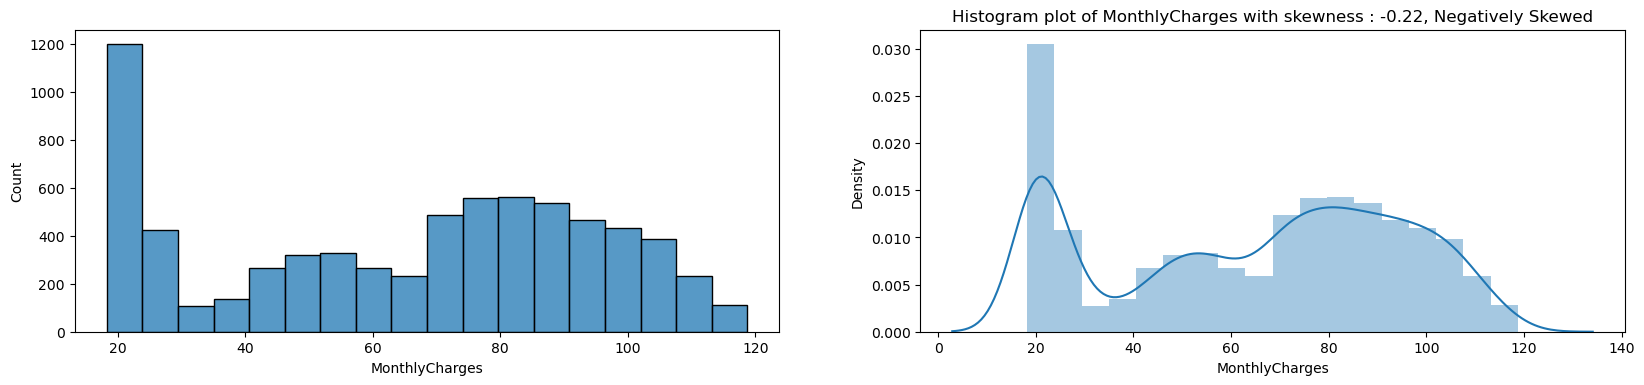

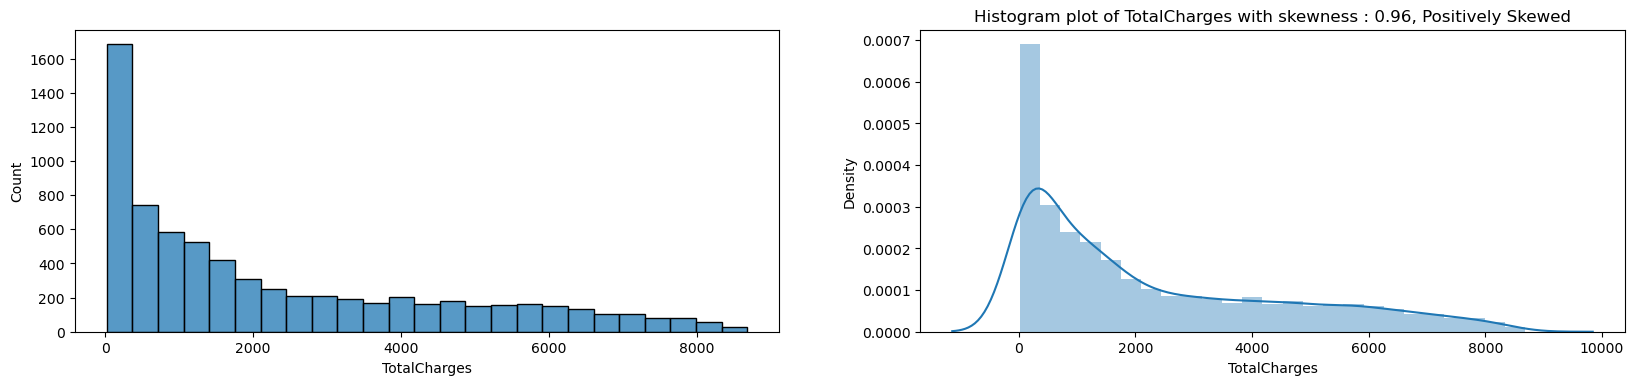

In [24]:
def Histogramplot2(attribute,dataset):
    for i in range(len(attribute)):
        var = str(attribute[i])
        plt.figure(figsize=(20,4),dpi=100)
        plt.subplot(1,2,1)
        sns.histplot(dataset[f'{var}'])
        plt.subplot(1,2,2)
        sns.distplot(dataset[f'{var}'])
        Skw = (skew(dataset[f'{var}'], axis=0, bias=True))
        plt.title(f'Histogram plot of {var} with skewness : {np.round(Skw,2)}, {Skewness(Skw)}')

attribute_numerical = ['tenure','MonthlyCharges','TotalCharges']
Histogramplot2(attribute_numerical,Data)

## (d). Distribution of the attributes of the data using violin and box-plot

In [25]:
Columns = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
           'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

for i in range(len(Columns)):
    var = str(Columns[i])
    Encoded = le.fit_transform(dataset3[f'{var}'])
    dataset3[f'{var}'] = Encoded
    
dataset3['TotalCharges'] = Data['TotalCharges']
Violin_attr = dataset3.keys()
Violin_attr = dataset3.keys()
Violin_attr

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'TotalCharges'],
      dtype='object')

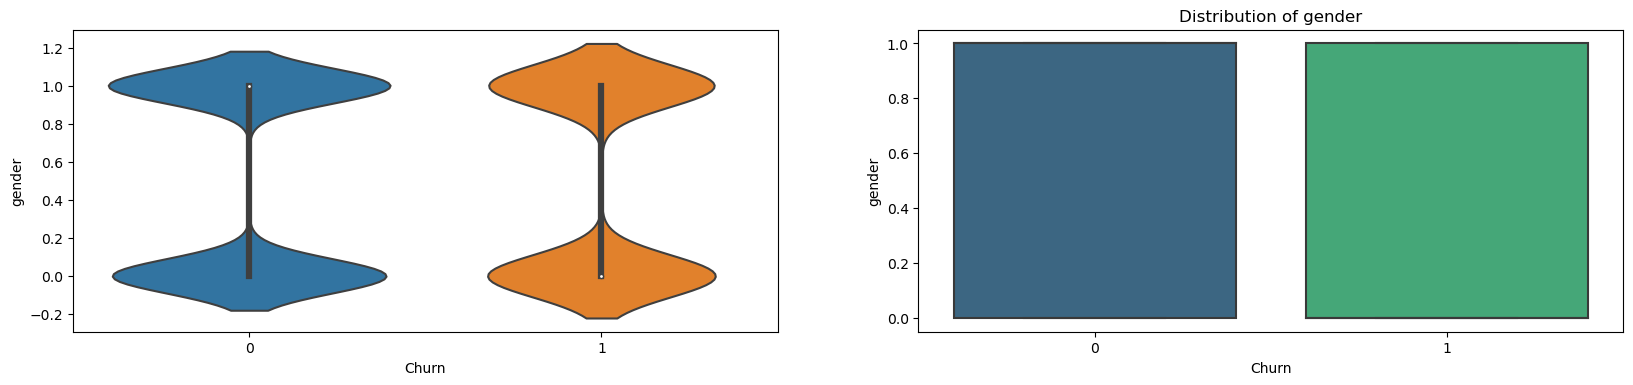

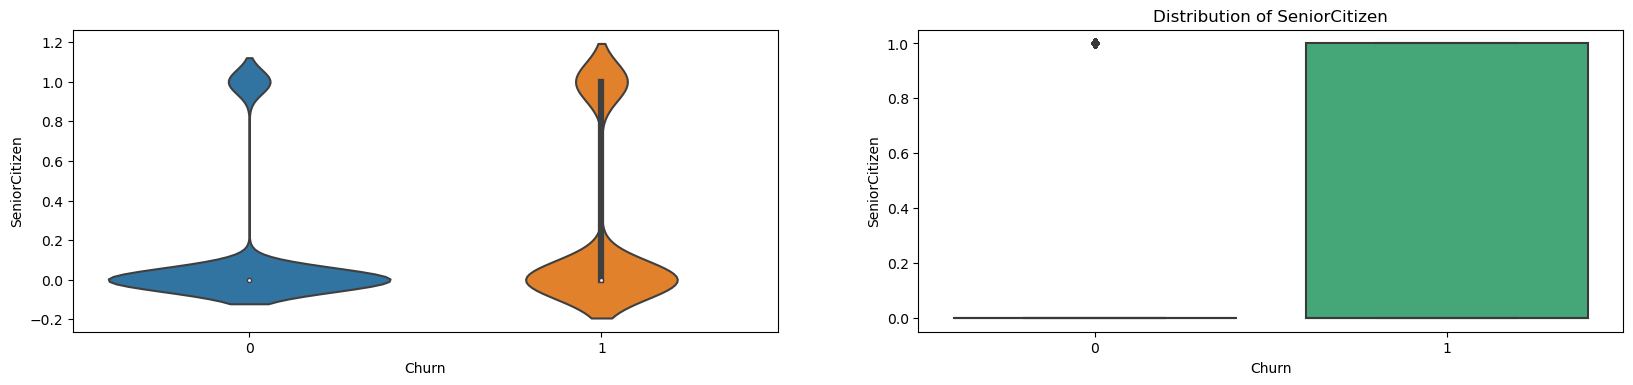

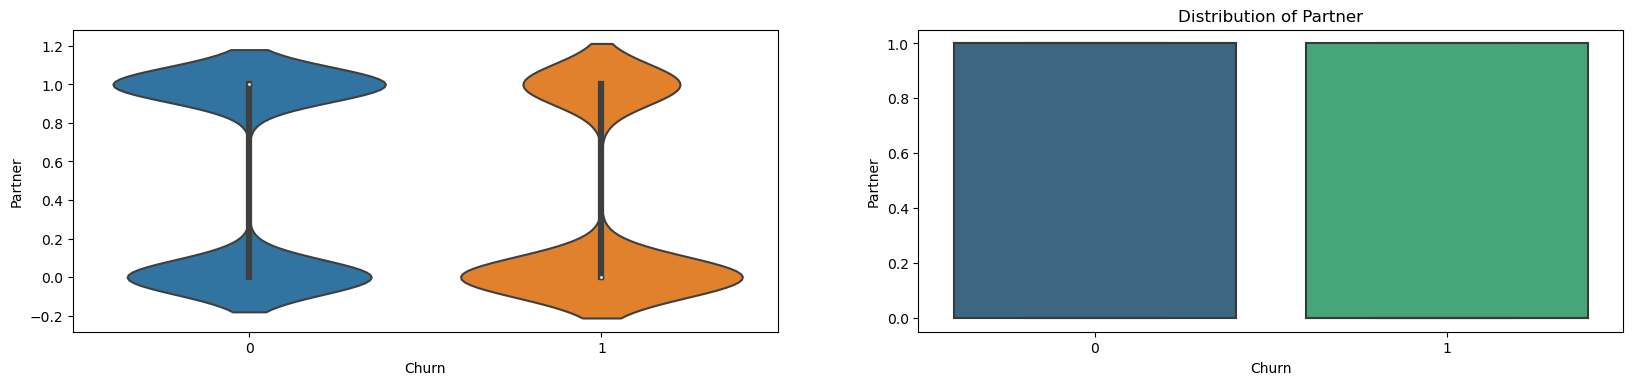

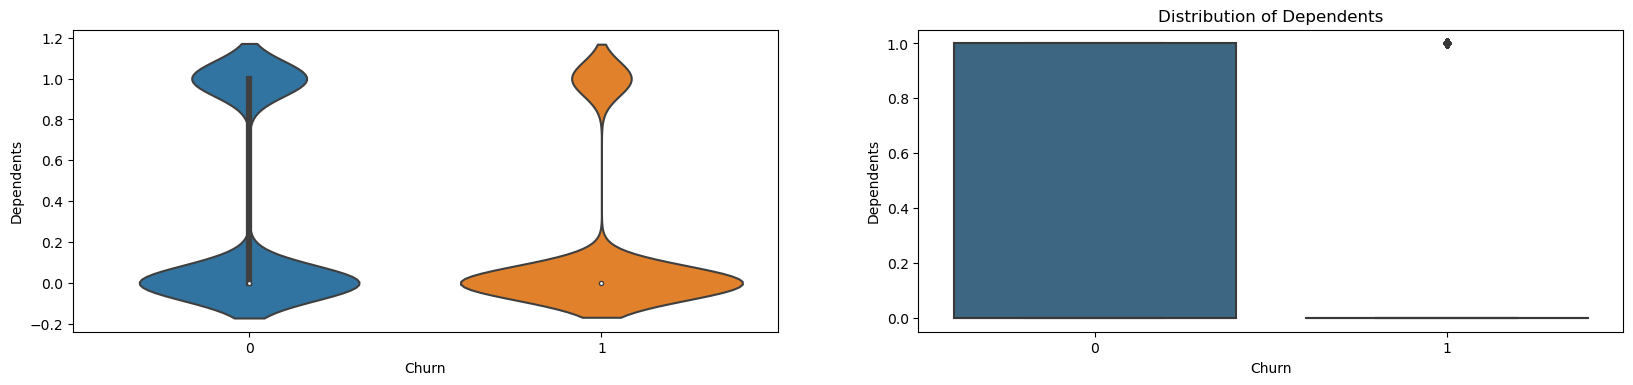

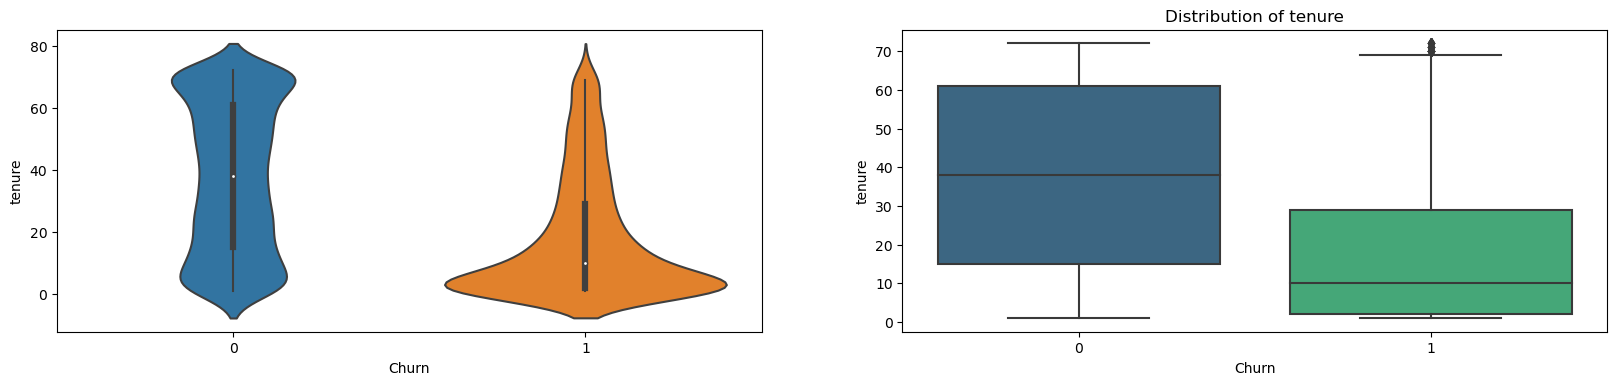

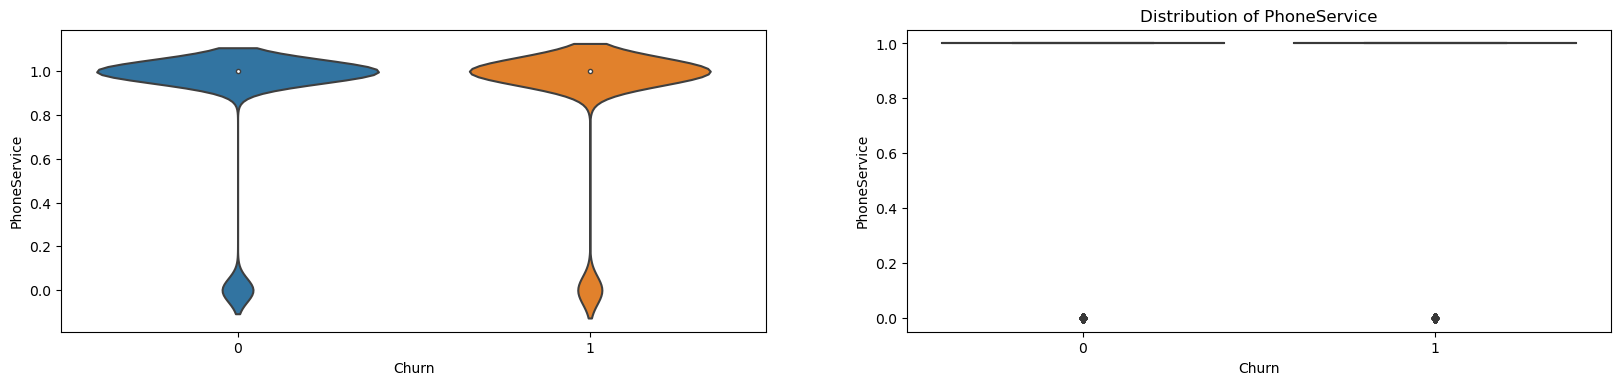

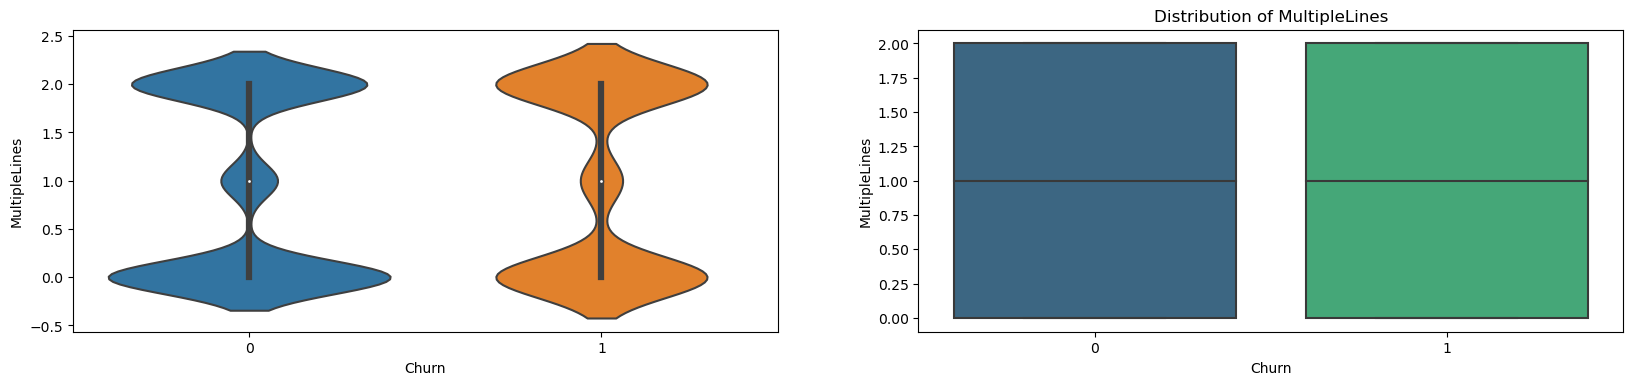

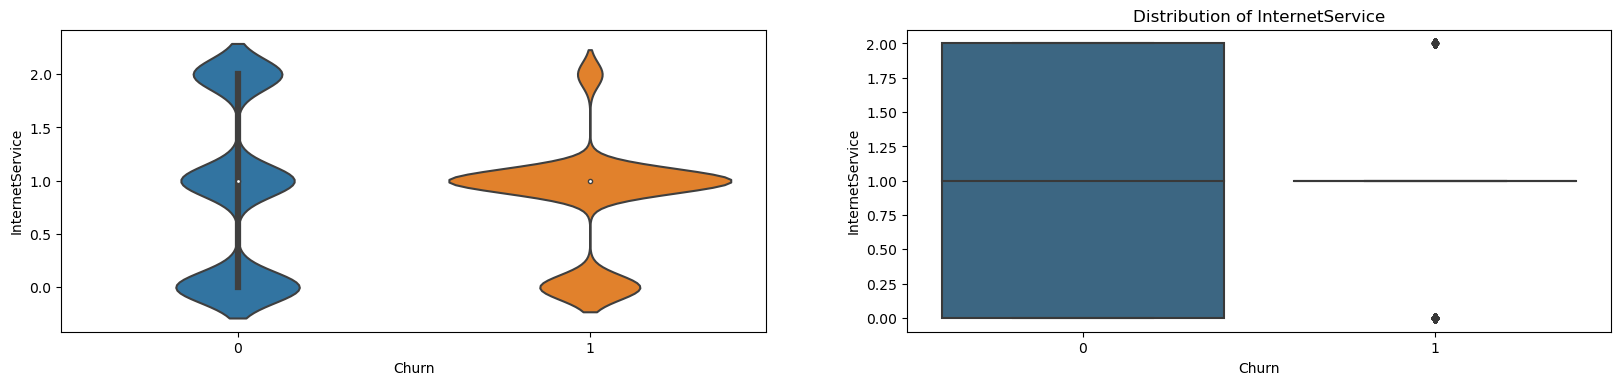

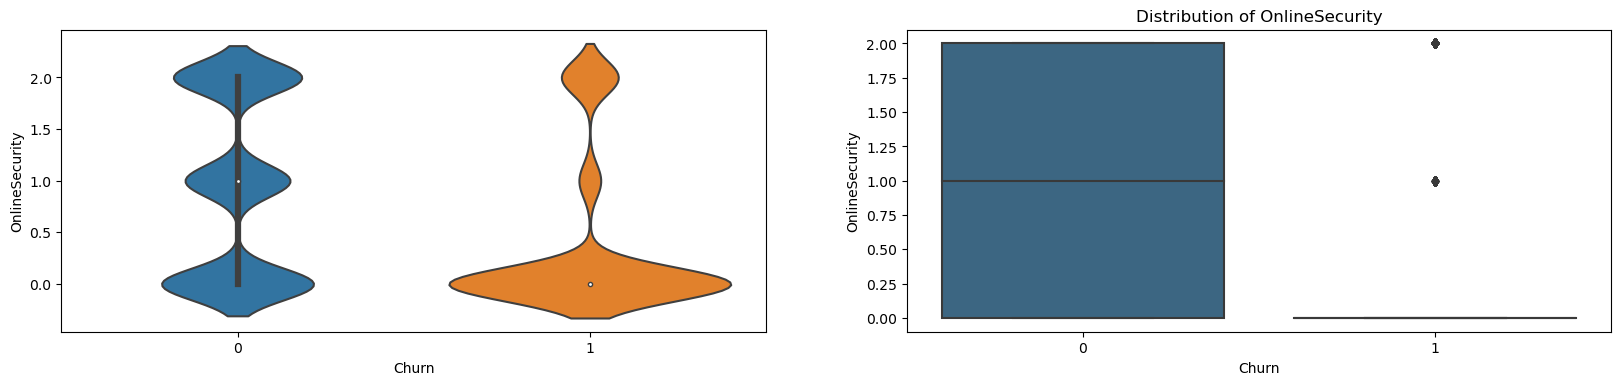

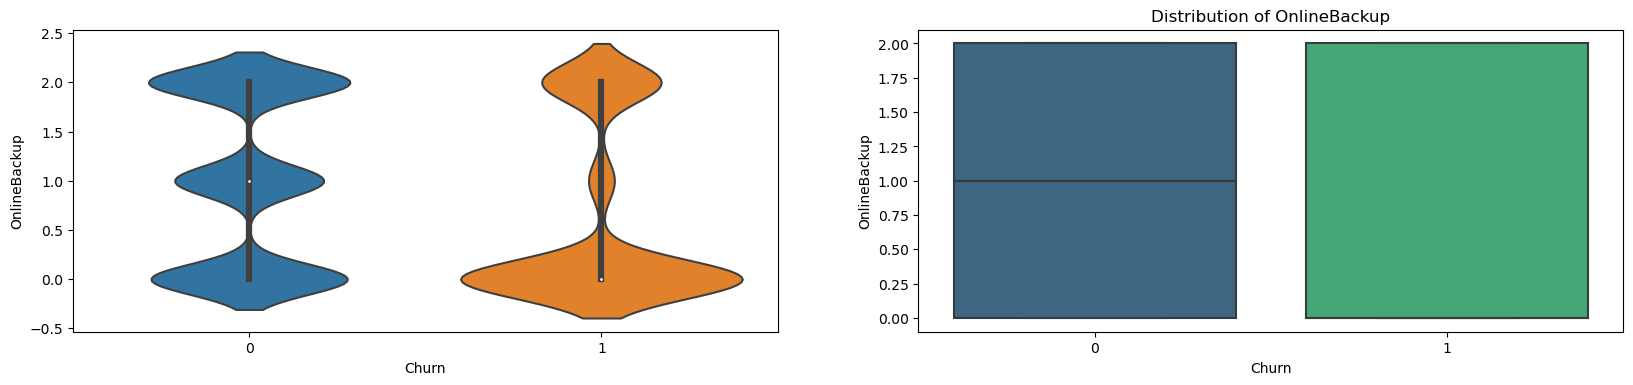

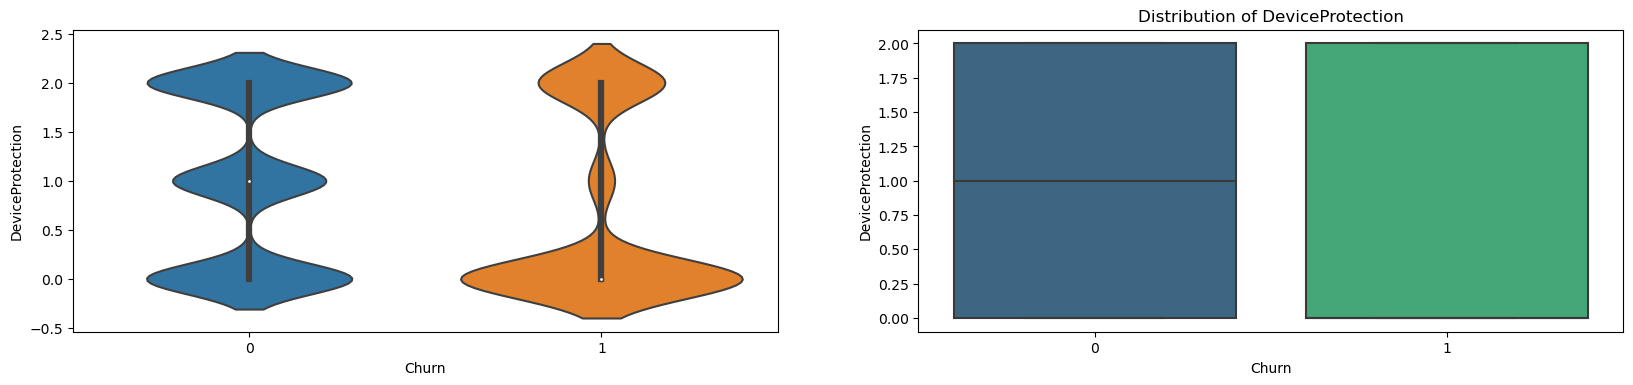

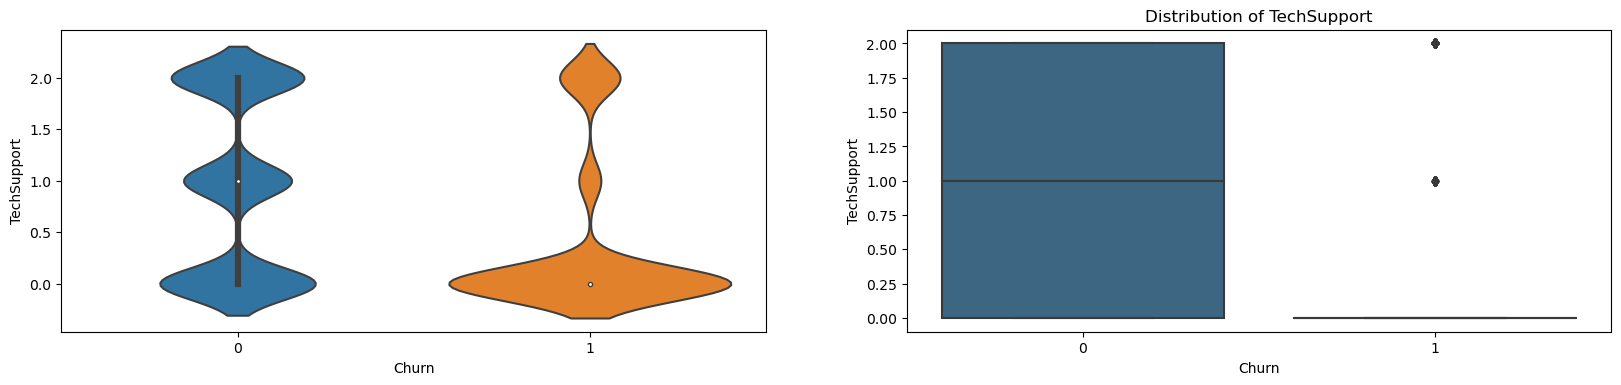

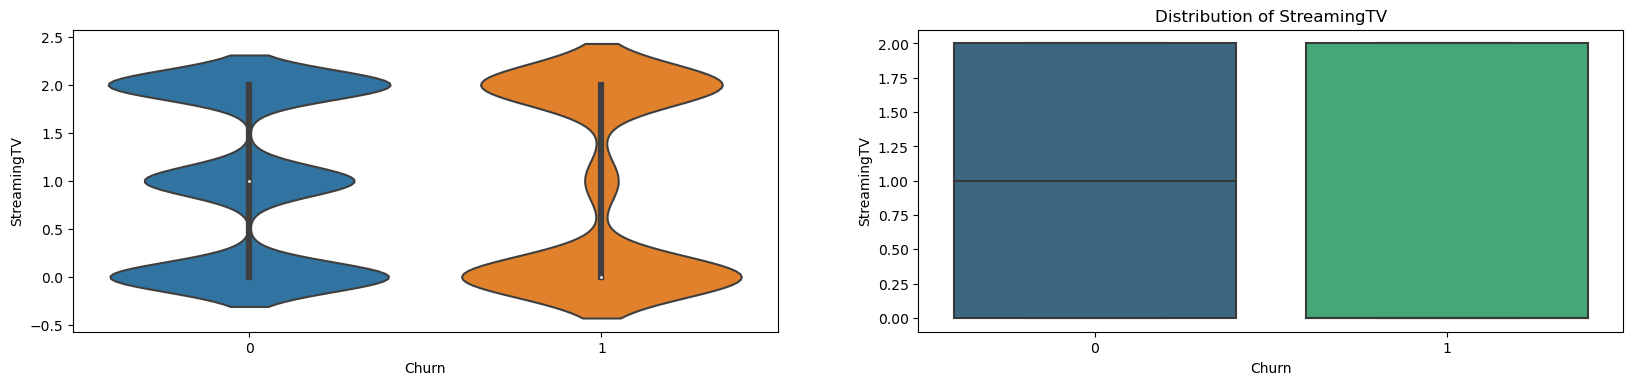

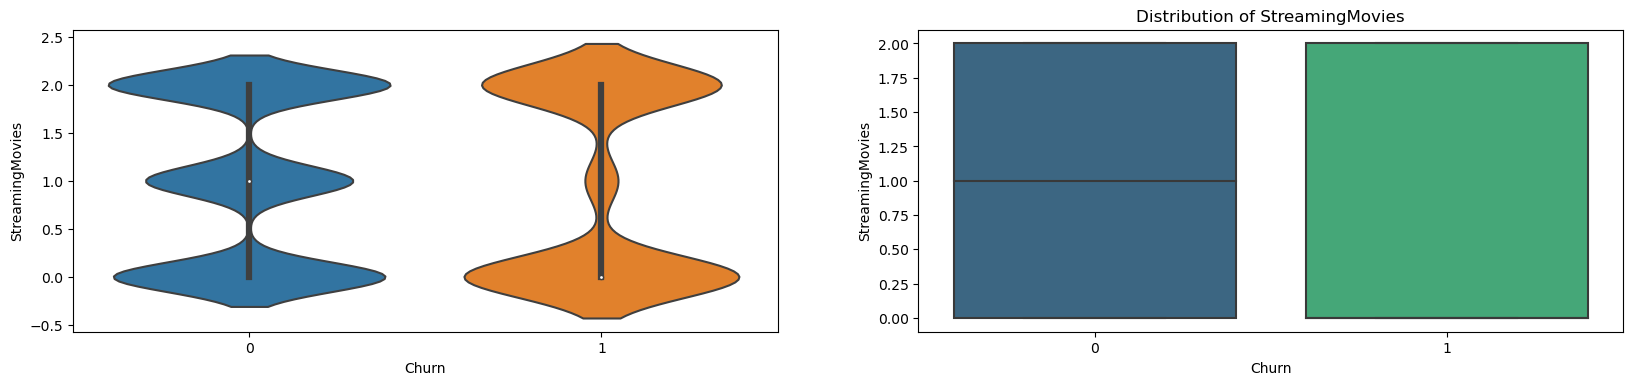

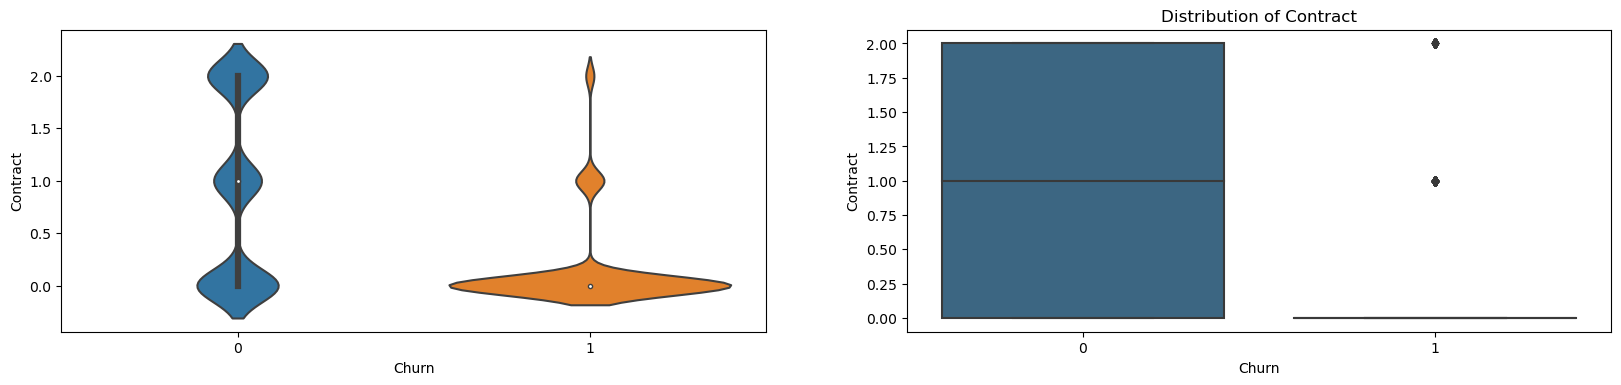

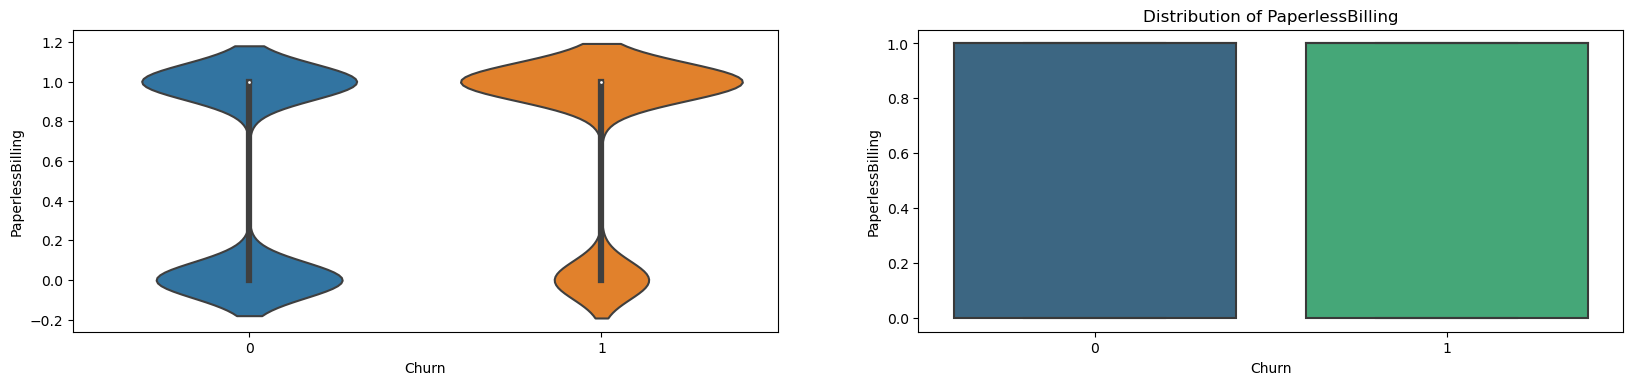

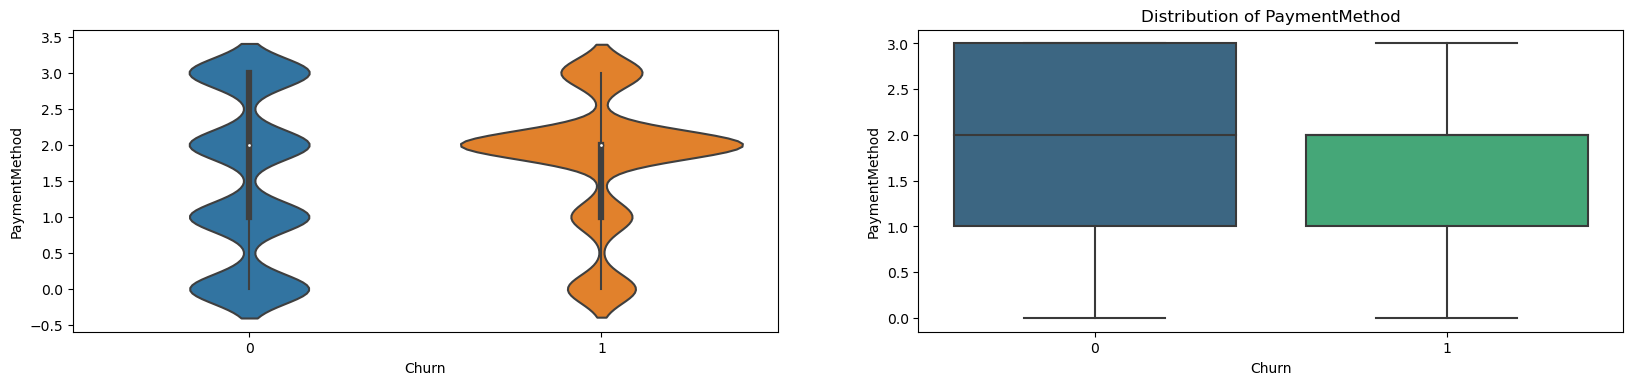

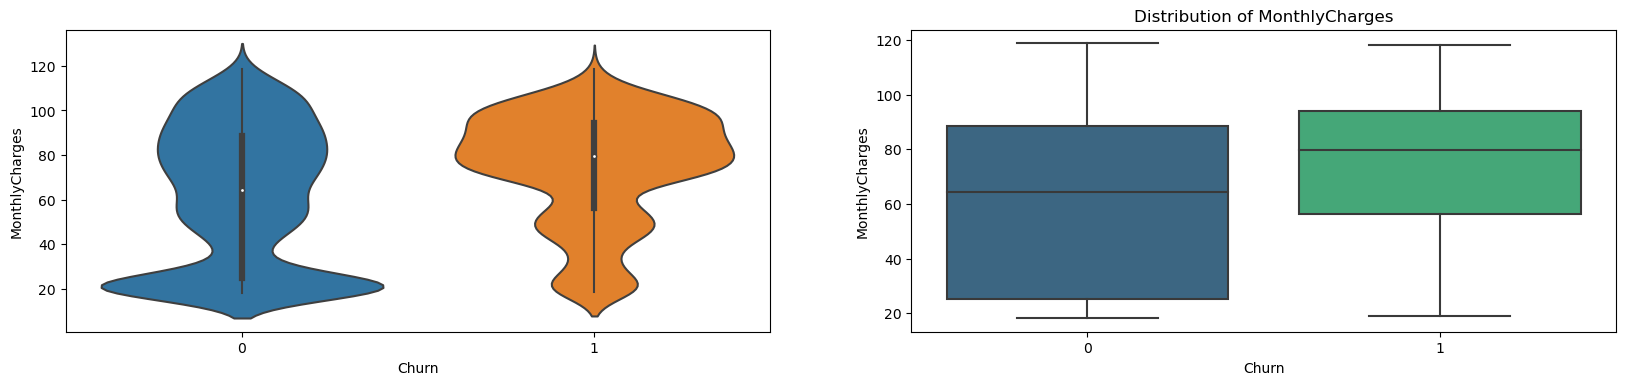

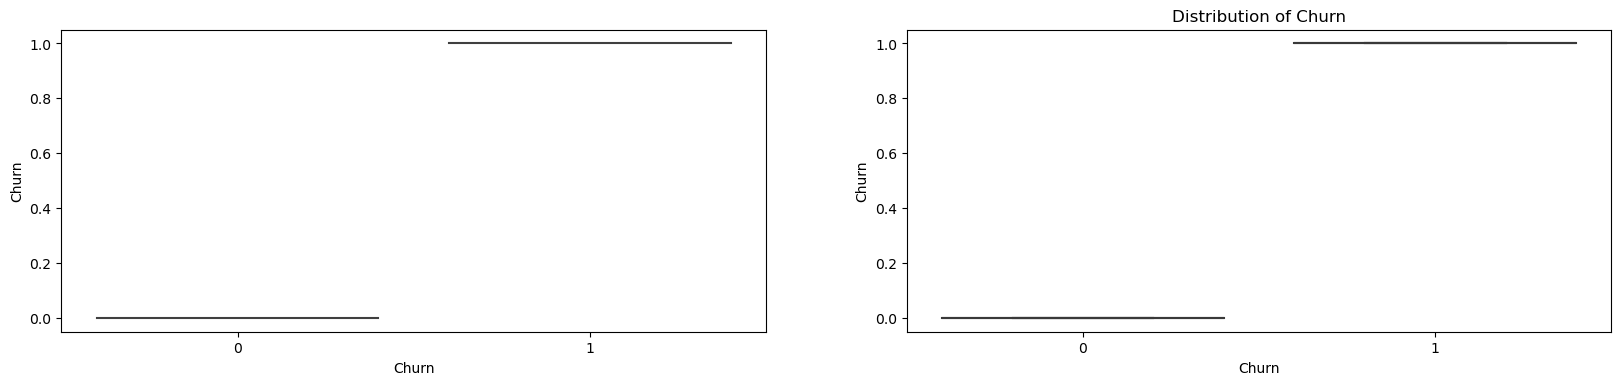

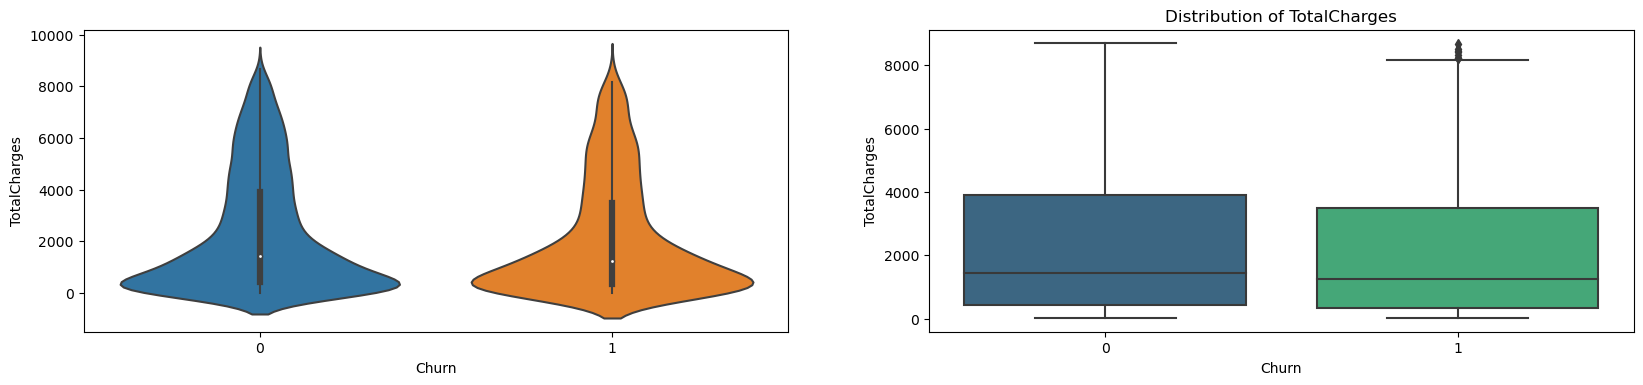

In [26]:
for i in range(len(Violin_attr)):
    var = str(Violin_attr[i])
    plt.figure(figsize=(20,4),dpi=100)
    plt.subplot(1,2,1)
    sns.violinplot(y = dataset3[f'{var}'],x=dataset3['Churn'])
    plt.subplot(1,2,2)
    sns.boxplot(data=dataset3,x = 'Churn', y = f'{var}', palette='viridis')
    plt.title(f'''Distribution of {var}''')

# (e) Outlier detection and its removal
### Why we are removing the outliers ?
+ Our model will try to learn outliers ( not following the general trend of the data ) data also and will result in junk model

## Method 1 : Using Box-plots

### 1. Categorical dataset attributes

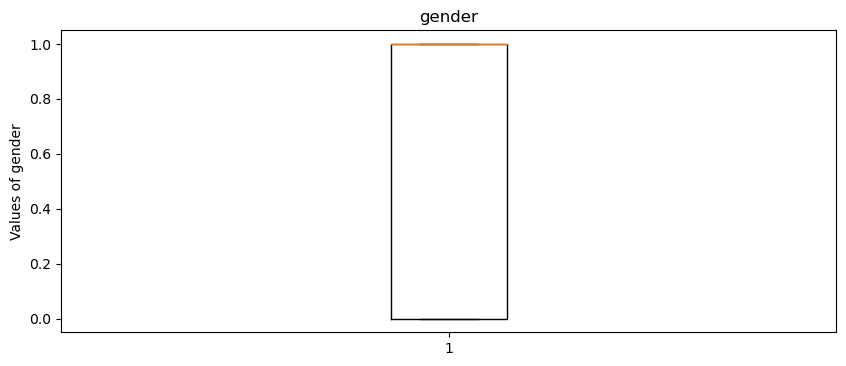

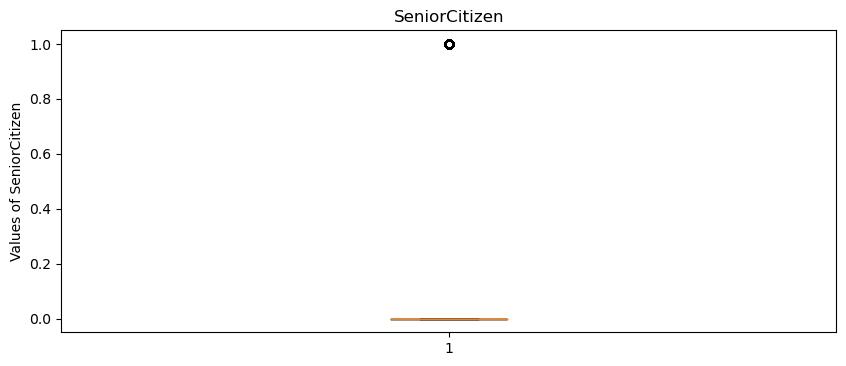

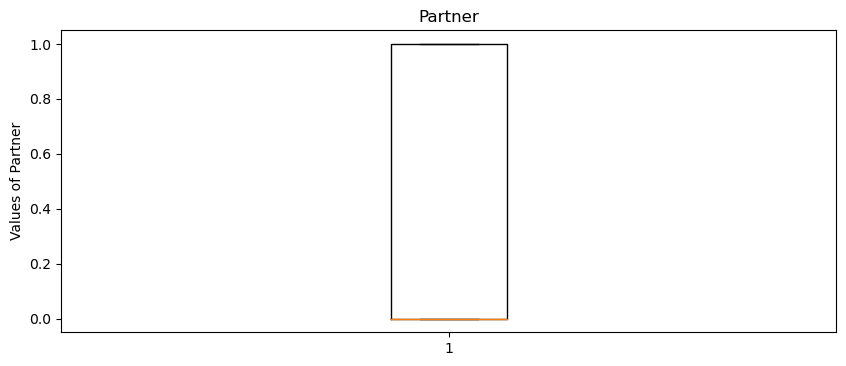

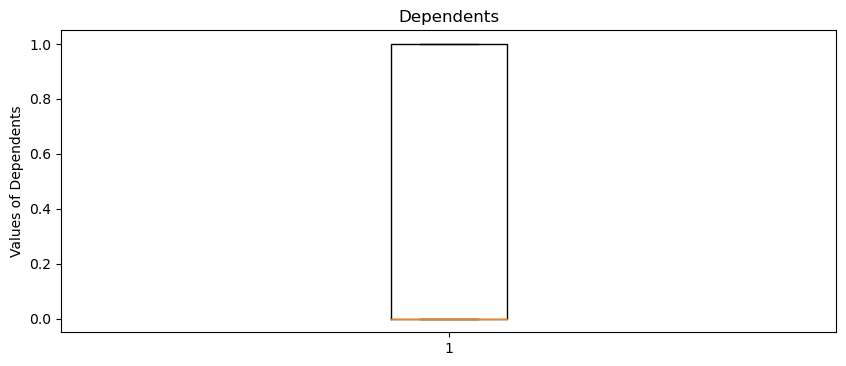

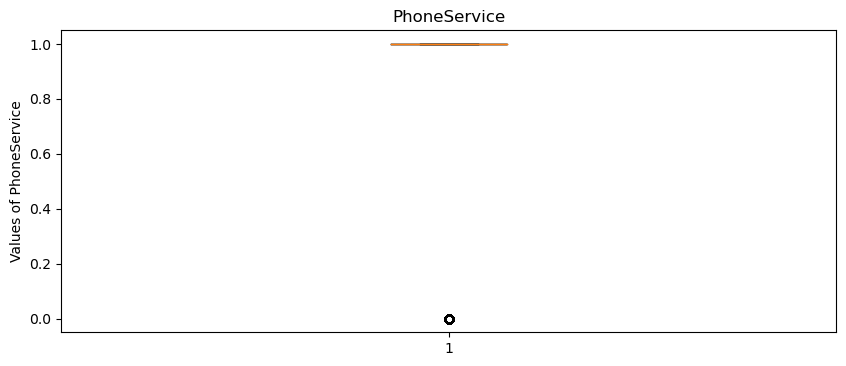

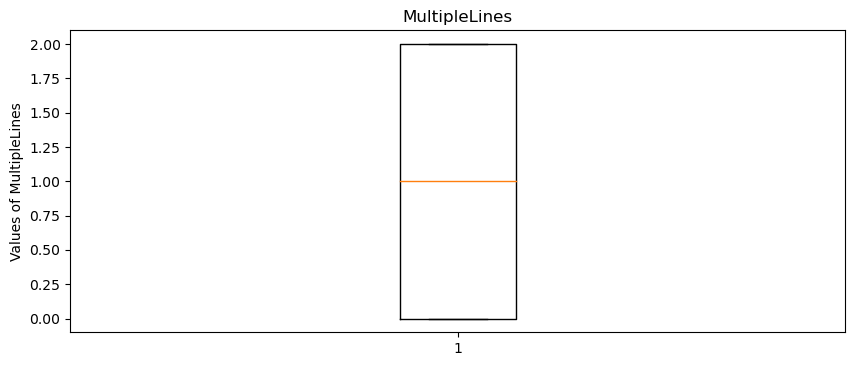

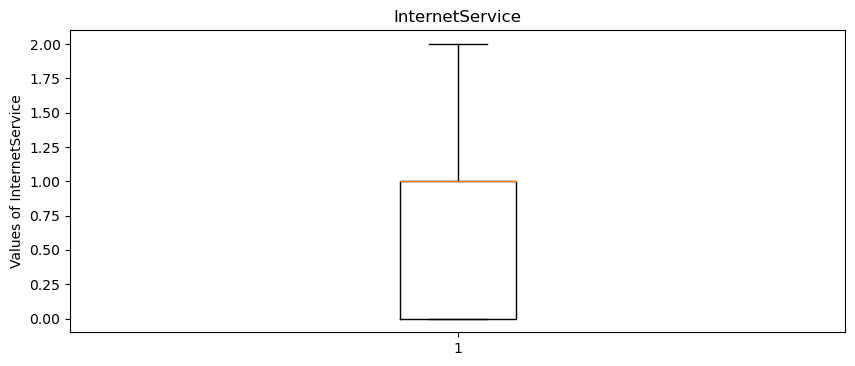

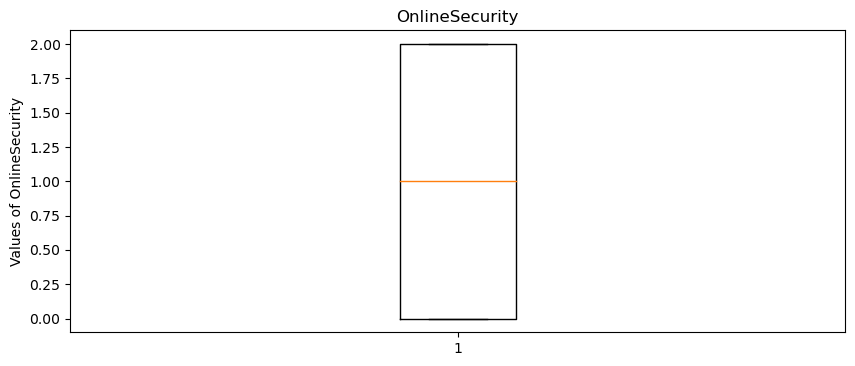

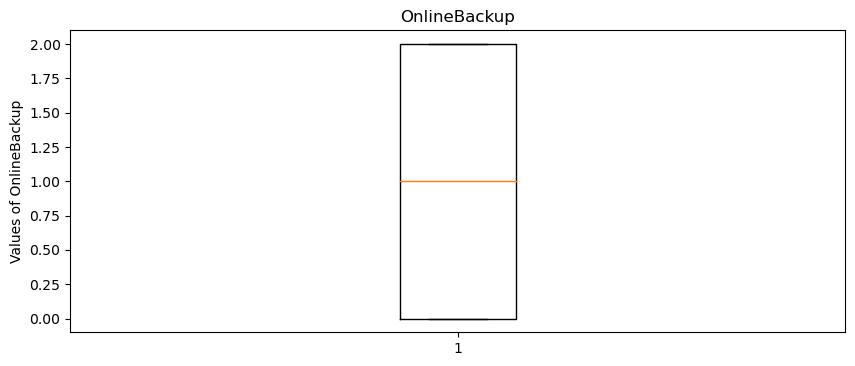

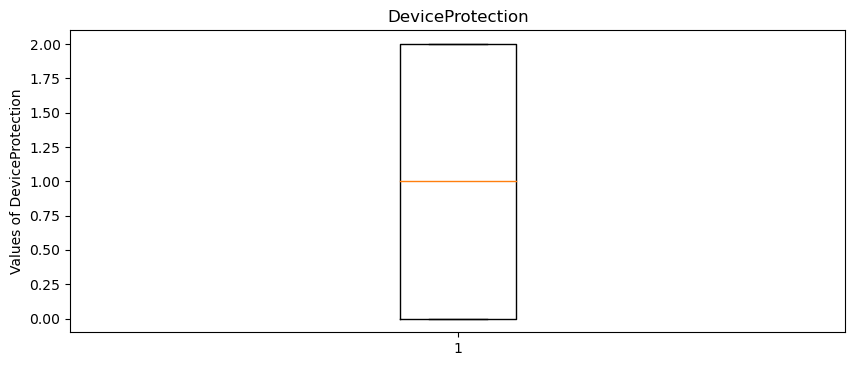

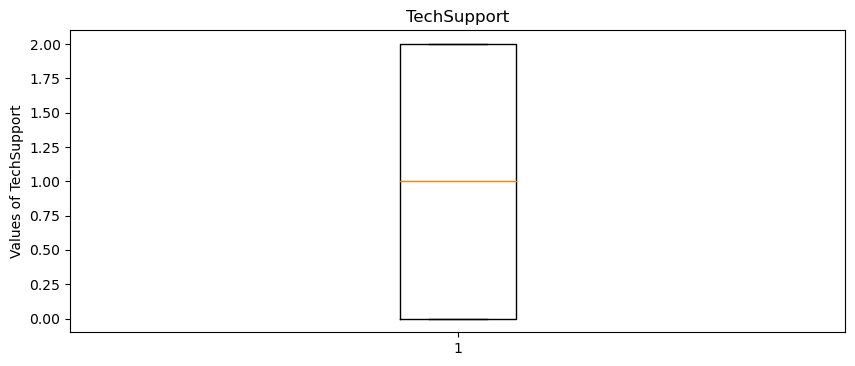

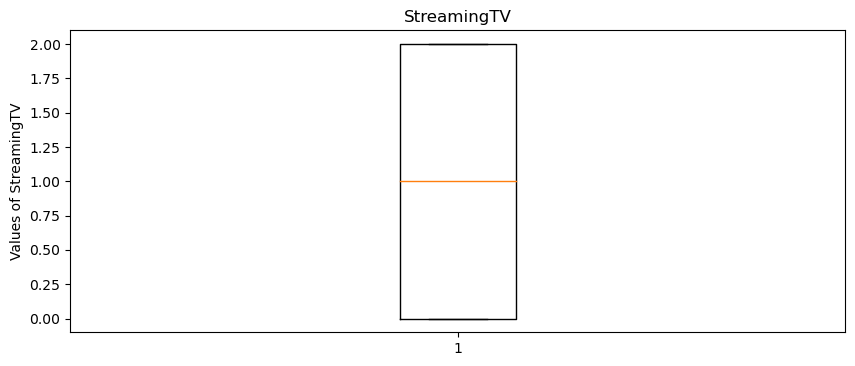

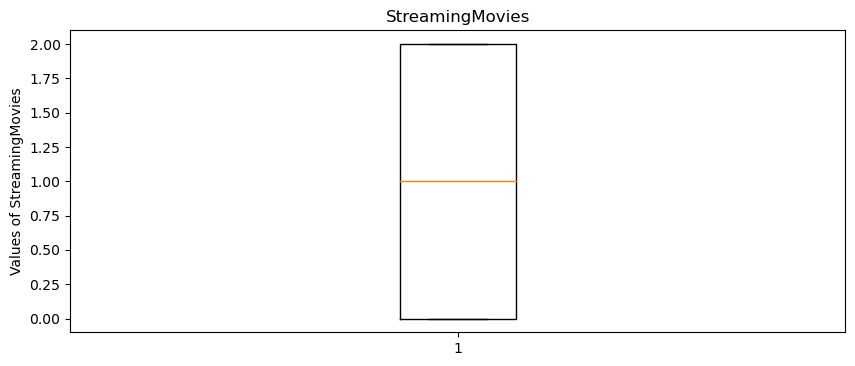

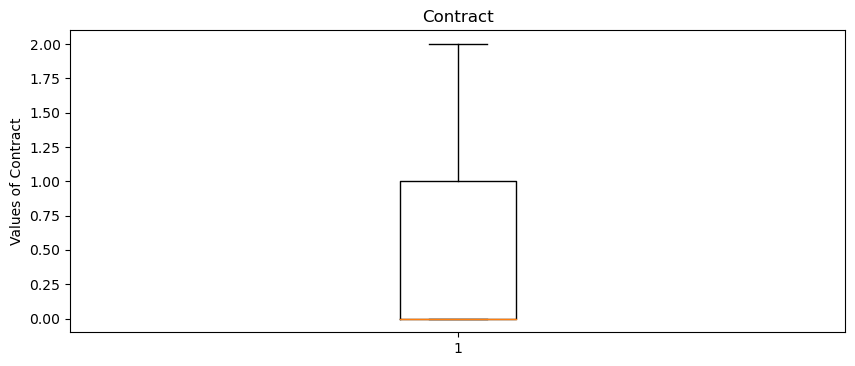

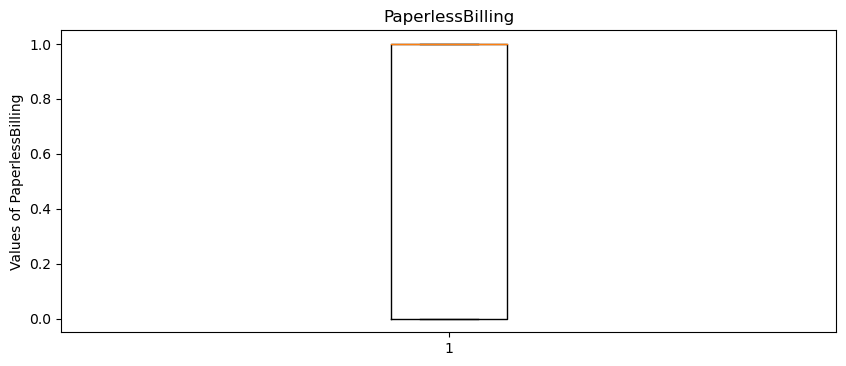

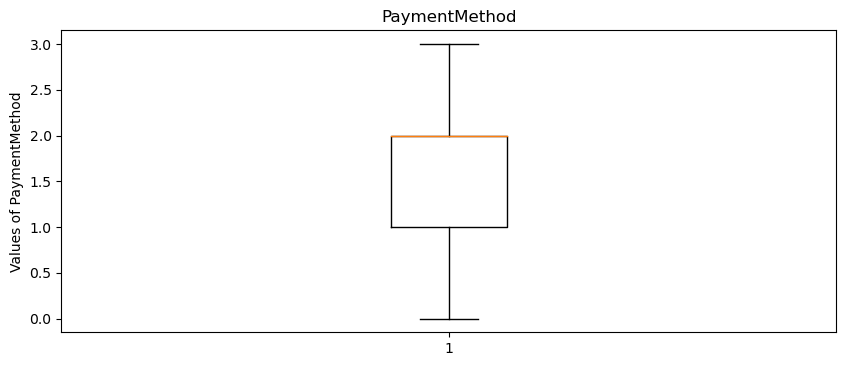

In [27]:
for i in range(len(attribute_Categorical)):
    col = attribute_Categorical[i]
    plt.figure(figsize=(10,4),dpi=100)
    plt.boxplot(dataset3[col]) 
    plt.ylabel(f'Values of {col}')
    plt.title(col)

### 2. Numerical attributes

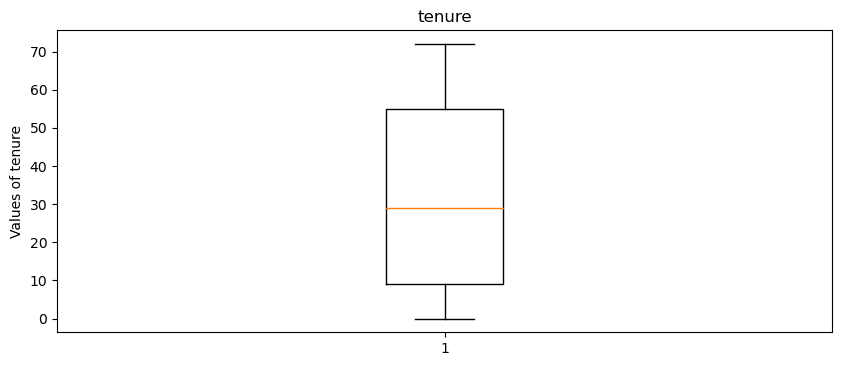

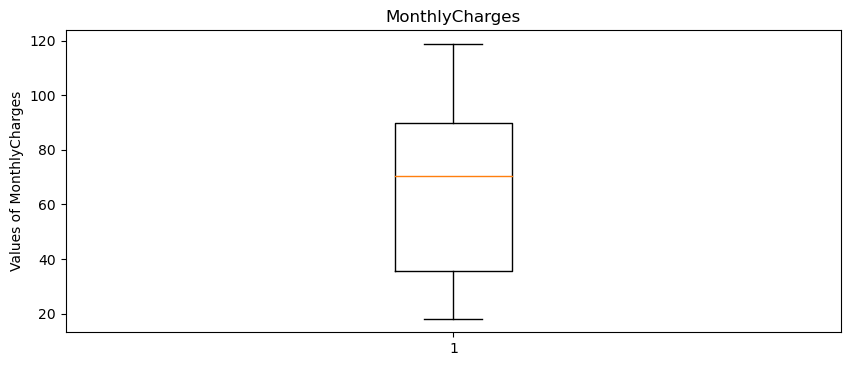

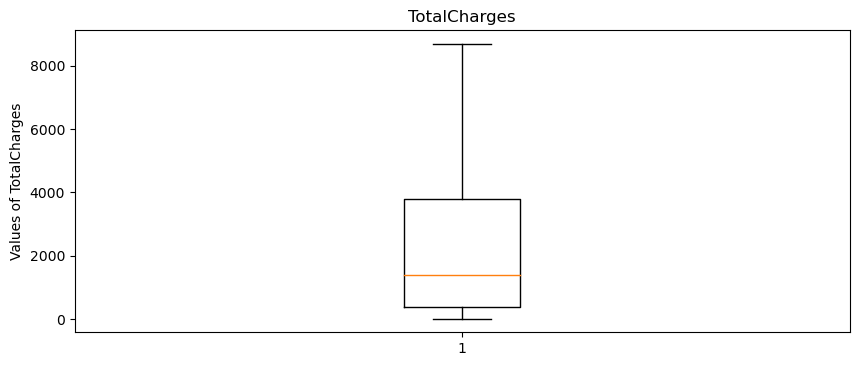

In [28]:
for i in range(len(attribute_numerical)):
    col = attribute_numerical[i]
    plt.figure(figsize=(10,4),dpi=100)
    plt.boxplot(Data[col]) 
    plt.ylabel(f'Values of {col}')
    plt.title(col)

### There is no outliers in the Tenure, MonthlyCharges and TotalCharges data

## Method 2: Using Clustering

In [29]:
# for i in range(len(Violin_attr)):
#     for j in range(len(Violin_attr)):
#         if i!=j:
#             X  = Violin_attr[i]
#             Y  = Violin_attr[j]
#             fig, ax = plt.subplots(figsize=(10,5))
#             ax.scatter(dataset3[X],dataset3[Y]) 
#             ax.set_xlabel(f'{X}')
#             ax.set_ylabel(f'{Y}')
#             ax.set_title(f'Scatter Plot between {X} and {Y}')

From scatter plot we can see that only one group is formed so there is no outliers in the Tenure, MonthlyCharges and TotalCharges data

Now : 
+ Data is not having any attributes with noisy values
+ Data is consistent as all the attributes are having their importance and they are unique and important for the prediction of churn of customer
+ There is no intentional data

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3. Data Reduction</p>

# Method 1 : By correlation
+ Remove the most correlated data attributes

## 1. Correlation by Chi-Square Test 
+ For the two nominal attributes

Step I : Creating contingency table

contingency_table :-



<AxesSubplot:xlabel='gender', ylabel='InternetService'>

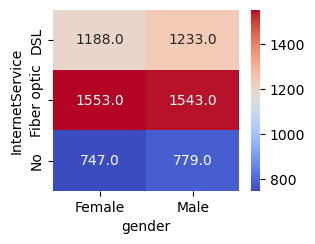

In [30]:
contingency_table = pd.crosstab(Data['InternetService'],Data['gender'])
print('contingency_table :-\n')
plt.figure(figsize=(3,2.4),dpi=100)
sns.heatmap(contingency_table,cmap='coolwarm',fmt=".1f",annot=True)

Chi - squared tests are based on the so-called chi-squared statistic. We calculate the chi-squared statistic with the following formula: 

$$ sum(\frac{(observed-expected)^2}{expected}) $$

In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the samples for the corresponding category. Let's calculate the chi-squared statistic for our data to illustrate:

Step II : Observed and Expected values

Observed Values :-



<AxesSubplot:>

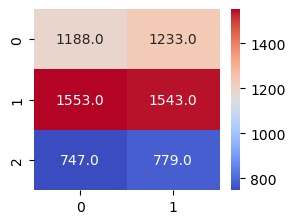

In [31]:
Observed_Values = contingency_table.values 
print("Observed Values :-\n")
plt.figure(figsize=(3,2.4),dpi=100)
sns.heatmap(Observed_Values,cmap='coolwarm',fmt=".1f",annot=True)

Expected Values :-



<AxesSubplot:>

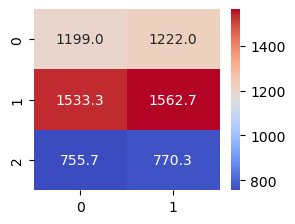

In [32]:
b = scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n")
plt.figure(figsize=(3,2.4),dpi=100)
sns.heatmap(Expected_Values,cmap='coolwarm',fmt=".1f",annot=True)

Step III : Degree of Freedom

In [33]:
N_rows,N_columns = contingency_table.shape
Dof = (N_rows-1)*(N_columns-1)
print("Degree of Freedom:-",Dof)

Degree of Freedom:- 2


Step IV : Significance Level 5 %

In [34]:
alpha = 0.05

Step V : Chi-square statistic - χ2

In [35]:
chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.9024775877890381


Step VI : Critical_value

In [36]:
critical_value = chi2.ppf(q = 1-alpha,df = Dof)
print('critical_value:',critical_value)

critical_value: 5.991464547107979


Step VII : P-value

In [37]:
P_value = 1 - chi2.cdf(x = chi_square_statistic,df = Dof)
print('P-value:',P_value)

P-value: 0.6368387508139732


Step VIII : Compare chi_square_statistic with critical_value and p-value 

In [38]:
if chi_square_statistic >= critical_value:
    print("Reject hypothesis, variables are dependent")
else:
    print("Retain hypothesis, variables are independent")
    
if P_value <= alpha:
    print("Reject hypothesis, variables are dependent")
else:
    print("Retain hypothesis, variables are independent")

Retain hypothesis, variables are independent
Retain hypothesis, variables are independent


### Creating function for the Chi - Square Test

In [39]:
def Chi_Square_Test(var1,var2,dataset):
    contingency_table = pd.crosstab(dataset[f'{var1}'],dataset[f'{var2}'])
    Observed_Values = contingency_table.values 
    
    b = scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    
    N_rows,N_columns = contingency_table.shape
    Dof = (N_rows-1)*(N_columns-1)
    
    alpha = 0.05
    
    chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    
    critical_value = chi2.ppf(q = 1-alpha,df = Dof)
    P_value = 1 - chi2.cdf(x = chi_square_statistic,df = Dof)
    
    from termcolor import colored, cprint
    print(colored(f"Chi - Square test between {var1} and {var2} :",'blue'))
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',Dof)
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value)
    print('p-value:',P_value)

    if chi_square_statistic >= critical_value:
        print(colored("Reject hypothesis, variables are dependent",'blue'))
    else:
        print(colored(f"Retain hypothesis, variables are independent",'blue'))
        
    if P_value <= alpha:
        print(colored("Reject hypothesis, variables are dependent",'blue'))
    else:
        print(colored(f"Retain hypothesis, variables are independent",'blue'))
        
    print('\n')

### Chi-square test between two categorical variables

In [40]:
for i in range(len(attribute_Categorical)):
    for j in range(len(attribute_Categorical)):
        if i!=j:
            Chi_Square_Test(attribute_Categorical[i],attribute_Categorical[j],Data)

Chi - Square test between gender and SeniorCitizen :
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.024726531321520695
critical_value: 3.841458820694124
p-value: 0.8750504081004491
Retain hypothesis, variables are independent
Retain hypothesis, variables are independent


Chi - Square test between gender and Partner :
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.023024637982350632
critical_value: 3.841458820694124
p-value: 0.8793930196434994
Retain hypothesis, variables are independent
Retain hypothesis, variables are independent


Chi - Square test between gender and Dependents :
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.778949646766089
critical_value: 3.841458820694124
p-value: 0.377462567732045
Retain hypothesis, variables are independent
Retain hypothesis, variables are independent


Chi - Square test between gender and PhoneService :
Significance level:  0.05
Degree of Freedom:  1
chi-square statisti

Chi - Square test between Partner and OnlineBackup :
Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 73.21628049608475
critical_value: 5.991464547107979
p-value: 1.1102230246251565e-16
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between Partner and DeviceProtection :
Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 86.12004808507547
critical_value: 5.991464547107979
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between Partner and TechSupport :
Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 42.76290418763554
critical_value: 5.991464547107979
p-value: 5.177895889829642e-10
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between Partner and StreamingTV :
Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 65.4639324

Chi - Square test between MultipleLines and PhoneService :
Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 7042.999999999998
critical_value: 5.991464547107979
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between MultipleLines and InternetService :
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 1652.7504579770025
critical_value: 9.487729036781154
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between MultipleLines and OnlineSecurity :
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 615.3355307731397
critical_value: 9.487729036781154
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between MultipleLines and OnlineBackup :
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 598.5866596660194
c

Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 822.8130737914412
critical_value: 5.991464547107979
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between OnlineSecurity and PaymentMethod :
Significance level:  0.05
Degree of Freedom:  6
chi-square statistic: 138.89818100437137
critical_value: 12.591587243743977
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between OnlineBackup and gender :
Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 1.3409496349198287
critical_value: 5.991464547107979
p-value: 0.5114656672930569
Retain hypothesis, variables are independent
Retain hypothesis, variables are independent


Chi - Square test between OnlineBackup and SeniorCitizen :
Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 235.2800867726225
critical_value: 5.991464547107979
p-value: 0.0
Re

Chi - Square test between TechSupport and StreamingMovies :
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 6378.87290060624
critical_value: 9.487729036781154
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between TechSupport and Contract :
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 693.2611696315741
critical_value: 9.487729036781154
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between TechSupport and PaperlessBilling :
Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 764.7731000330009
critical_value: 5.991464547107979
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between TechSupport and PaymentMethod :
Significance level:  0.05
Degree of Freedom:  6
chi-square statistic: 148.82414863094314
critical_va

Chi - Square test between Contract and OnlineSecurity :
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 961.4898501401146
critical_value: 9.487729036781154
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between Contract and OnlineBackup :
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 816.786922102162
critical_value: 9.487729036781154
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between Contract and DeviceProtection :
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 1002.4347229643786
critical_value: 9.487729036781154
p-value: 0.0
Reject hypothesis, variables are dependent
Reject hypothesis, variables are dependent


Chi - Square test between Contract and TechSupport :
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 1104.1074298575638
critical_value: 9.487

## 2. Correlation by Pearson's coefficient

<AxesSubplot:>

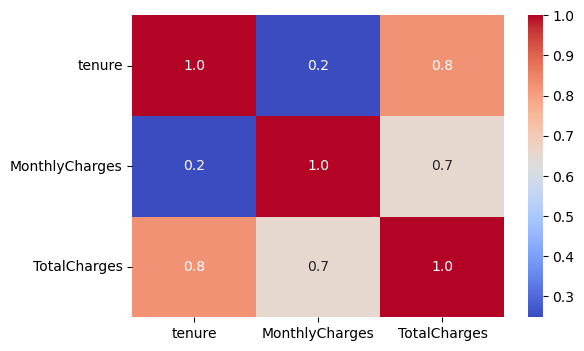

In [41]:
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(Data.corr(),cmap='coolwarm',fmt=".1f",annot=True)

### Identifying the redundant attributes in the dataset using Pearson correlation coefficient

In [42]:
for i in range(len(attribute_numerical)):
    for j in range(len(attribute_numerical)):
        corr, _ = pearsonr(Data[attribute_numerical[i]], Data[attribute_numerical[j]])
        if i!=j:
            if corr>=0.75:
                print(f'Pearsons correlation between {attribute_numerical[i]} and {attribute_numerical[j]}: %.3f' % corr)

Pearsons correlation between tenure and TotalCharges: 0.826
Pearsons correlation between TotalCharges and tenure: 0.826


+ Two attributes tenure and total charges were found more than 82.6 % correlated with each other
+ But we can't remove any attribute 

## Method 2 : Dimensionality or attribute reduction by PCA

Why we need to perform the dimensionality reduction on the selected features before putting them through the ML algorithm.  
+ In this Classification problem, there are many attributes on the basis of which the final classification will be done. 
+ The more will be the number of features, the algorithm  will take more time to run with it. 
+ Many of these features are correlated, and hence redundant. 

Dimensionality reduction is the process of reducing the number of random attributes under consideration, by obtaining a set of principal variables.
+ Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.
+ Here, I will be reducing the dimensions to 3.

#### Sufficient requirement for PCA :
+ Minimum number of attributes should be 2
+ Data type should be numeric since we require feature scaling before applying PCA on the raw data

### Seperating numerical attributes 

In [43]:
df = Data.copy()
df.drop(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV', 
         'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],axis=1, inplace=True)

In [44]:
df.keys()

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [45]:
# Step I : Feature Scaling ( Transforming the data values of all the attributes on single scale )
scaler = StandardScaler()
scaler.fit(df)
scaled_ds = pd.DataFrame(scaler.transform(df),columns= df.columns )
scaled_ds

tenure  MonthlyCharges  TotalCharges
0    -1.277445       -1.160323     -0.991980
1     0.066327       -0.259629     -0.171961
2    -1.236724       -0.362660     -0.957454
3     0.514251       -0.746535     -0.193457
4    -1.236724        0.197365     -0.942770
...        ...             ...           ...
7038 -0.340876        0.665992     -0.127424
7039  1.613701        1.277533      2.241555
7040 -0.870241       -1.168632     -0.852374
7041 -1.155283        0.320338     -0.869946
7042  1.369379        1.358961      2.076991

[7043 rows x 3 columns]

In [46]:
# Step II : Initiating PCA to reduce dimentions features to 3
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["PC1","PC2","PC3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
PC1  7043.0 -1.904230e-17  1.476759 -2.137997 -1.166653 -0.329688  1.089723   
PC2  7043.0 -6.644314e-18  0.871715 -1.916474 -0.667466 -0.065137  0.552428   
PC3  7043.0 -5.596041e-18  0.244380 -0.556461 -0.157607  0.036100  0.145946   

          max  
PC1  3.661651  
PC2  2.153175  
PC3  0.661446

In [47]:
PCA_ds['Churn'] = dataset4['Churn']
PCA_ds.head()

PC1       PC2       PC3  Churn
0 -1.948025  0.083589 -0.400563      0
1 -0.202850  0.235449  0.069232      0
2 -1.514432 -0.521745 -0.109559      1
3 -0.199588  0.891790  0.155149      0
4 -1.232588 -0.964674  0.085946      1

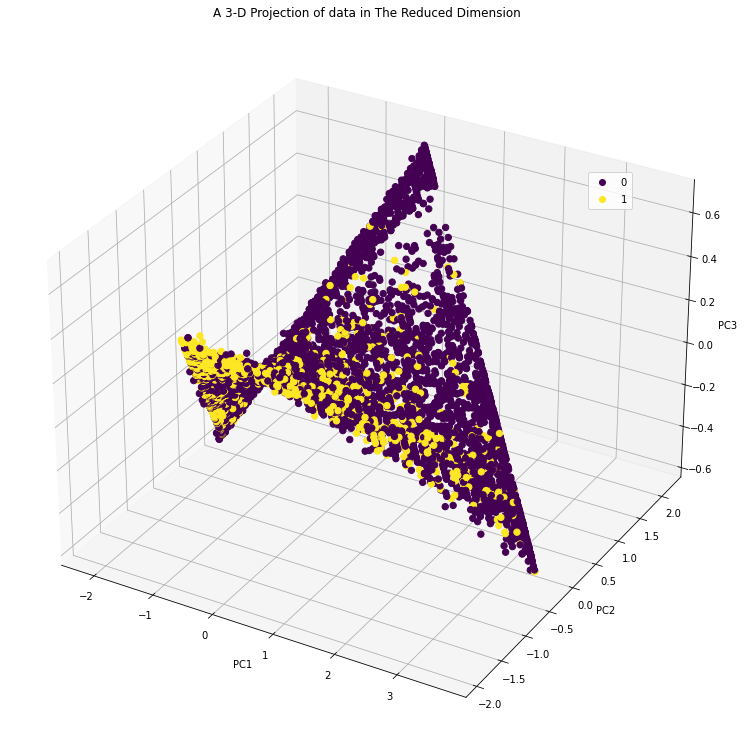

In [48]:
# Step III : A 3-D projection of dataset in the reduced dimension
x = PCA_ds["PC1"]
y = PCA_ds["PC2"]
z = PCA_ds["PC3"]

fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
cmap = 'viridis'
sc = ax.scatter(x, y, z, s=40, c=PCA_ds['Churn'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'''A 3-D Projection of data in The Reduced Dimension''')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(0.8,0.8), loc=2)

Text(0, 0.5, 'Explained Variance')

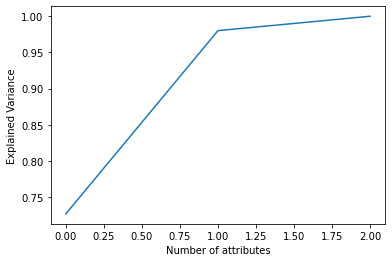

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of attributes')
plt.ylabel('Explained Variance')

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">4. Data Transformation by normalization</p>

### **Benifits :**
   + All attributes converted into equal weight avoiding dependence of measurement unit's choice
   + Scaled to fall within a smaller specified range
   + Make mining process more efficient and patterns found easier to understand

### Min-max normalization of the data

In [50]:
def Min_Max_Normalization(attribute,df,New_min,New_max):
    min_ = np.min(df[f'{attribute}'])
    max_ = np.max(df[f'{attribute}'])
    v = df[f'{attribute}']
    h = New_max - New_min
    min_maxN = ((v - min_) / (max_ - min_))*h + New_min
    return min_maxN

### Normalized Data

In [51]:
New_min = 0
New_max = 1
dataset_N1 = Data.copy()
for i in range(len(attribute_numerical)):
    N = Min_Max_Normalization(attribute_numerical[i],Data,New_min,New_max)
    dataset_N1[attribute_numerical[i]] = N

In [52]:
dataset_N1.head()

gender SeniorCitizen Partner Dependents    tenure PhoneService  \
0  Female            No     Yes         No  0.013889           No   
1    Male            No      No         No  0.472222          Yes   
2    Male            No      No         No  0.027778          Yes   
3    Male            No      No         No  0.625000           No   
4  Female            No      No         No  0.027778          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check        0.115423      0.001275   
1               No               Mailed check        0.385075      0.215867   
2              Yes               Mailed check        0.354229      0.010310   
3               No  Bank transfer (automatic)        0.239303      0.210241   
4              Yes           Electronic check        0.521891      0.014153   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

+ We will use the normalized data in the model building

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5. Taking care of the Class Imbalance of the Training Dataset</p>

In [53]:
Data_featuresf,Target_Varf = dataset_N1.iloc[:,:-1], dataset_N1.iloc[:,-1]

### Target Variable

In [54]:
Target_Variable = dataset_N1['Churn']
Target_Variable.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

+ Imbalanced datasets are those where there is a severe skew in the class distribution in the minority class to the majority class.
+ Here we can see there is Class Imbalance in the Data, Churn_No : Churn_Yes = 3:1
+ Model will be trained well for the Churn_No class as more datasets are available in this class
+ Model will be trained not so well for the Churn_Yes class as less datasets are available in this class

In [55]:
Target_Varf    = le.fit_transform(Target_Varf)
Target_Varf

array([0, 0, 1, ..., 0, 1, 0])

### Features of the Data

In [56]:
for i in range(len(attribute_Categorical)):
    Data_featuresf[f'{attribute_Categorical[i]}'] = le.fit_transform(Data_featuresf[f'{attribute_Categorical[i]}'])

Data_featuresf.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2        0.115423      0.001275  
1                 0              3        0.385075      0.215867  
2                 1              3        0.354229      0.010310  
3                 0              0        0.239303      0.210241  
4                 1              2        0.521891      0.014153

### Fixing the Class Imbalance in the data by resampling
+ Resampling involves creating a new transformed version of the training dataset in which the selected examples have a different class distribution.

## 1. Undersampling
+ Randomly eliminates the tuples from the majority class until there are an equal number of No and Yes tuples.
+ Taking equal samples of data corresponding to No and Yes both.

In [57]:
X, y = Data_featuresf,Target_Varf
rus1  = RandomUnderSampler(random_state=0)
X_res_U, y_res_U = rus1.fit_resample(X, y)

pd.DataFrame(y_res_U).value_counts()

0    1869
1    1869
dtype: int64

+ Drawback : 
  + Sample size is get reduced.
  + Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

## 2. Oversampling : 
+ Resamples the Yes tuples so that the resulting training set contains an equal number of both tuples.
+ Random oversampling duplicates the minority class in the training dataset and can result in overfitting for some models. 

In [58]:
rus2  = RandomOverSampler(random_state=0)
X_res_O, y_res_O = rus2.fit_resample(X, y)
pd.DataFrame(y_res_O).value_counts()

0    5174
1    5174
dtype: int64

## Splitting the dataset into the Training set and Test set

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X_res_O, y_res_O,test_size=0.3,random_state=0)

In [60]:
X_train.shape

(7243, 19)

In [61]:
X_test.shape

(3105, 19)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">6. Building the Separate Models</p>

# 1. Decision Tree classification model

+ The algorithm works by dividing the entire dataset into a tree-like structure supported by some rules and conditions. 
+ Then it gives predictions based on those conditions. 
+ There is a high chance of overfitting in this model because of the greater depth of trees and greater number of splits or branches. 
+ It increases the variance of the model by increasing the training error 
+ Due to overfitting problem, the prediction on new data points is relatively poor.

## ----> Fully grown tree 

### Training the simple model 

In [62]:
DTR_classifier = DecisionTreeClassifier()
DTR_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
X_train_predicted = DTR_classifier.predict(X_train)

### Visualizing decision tree

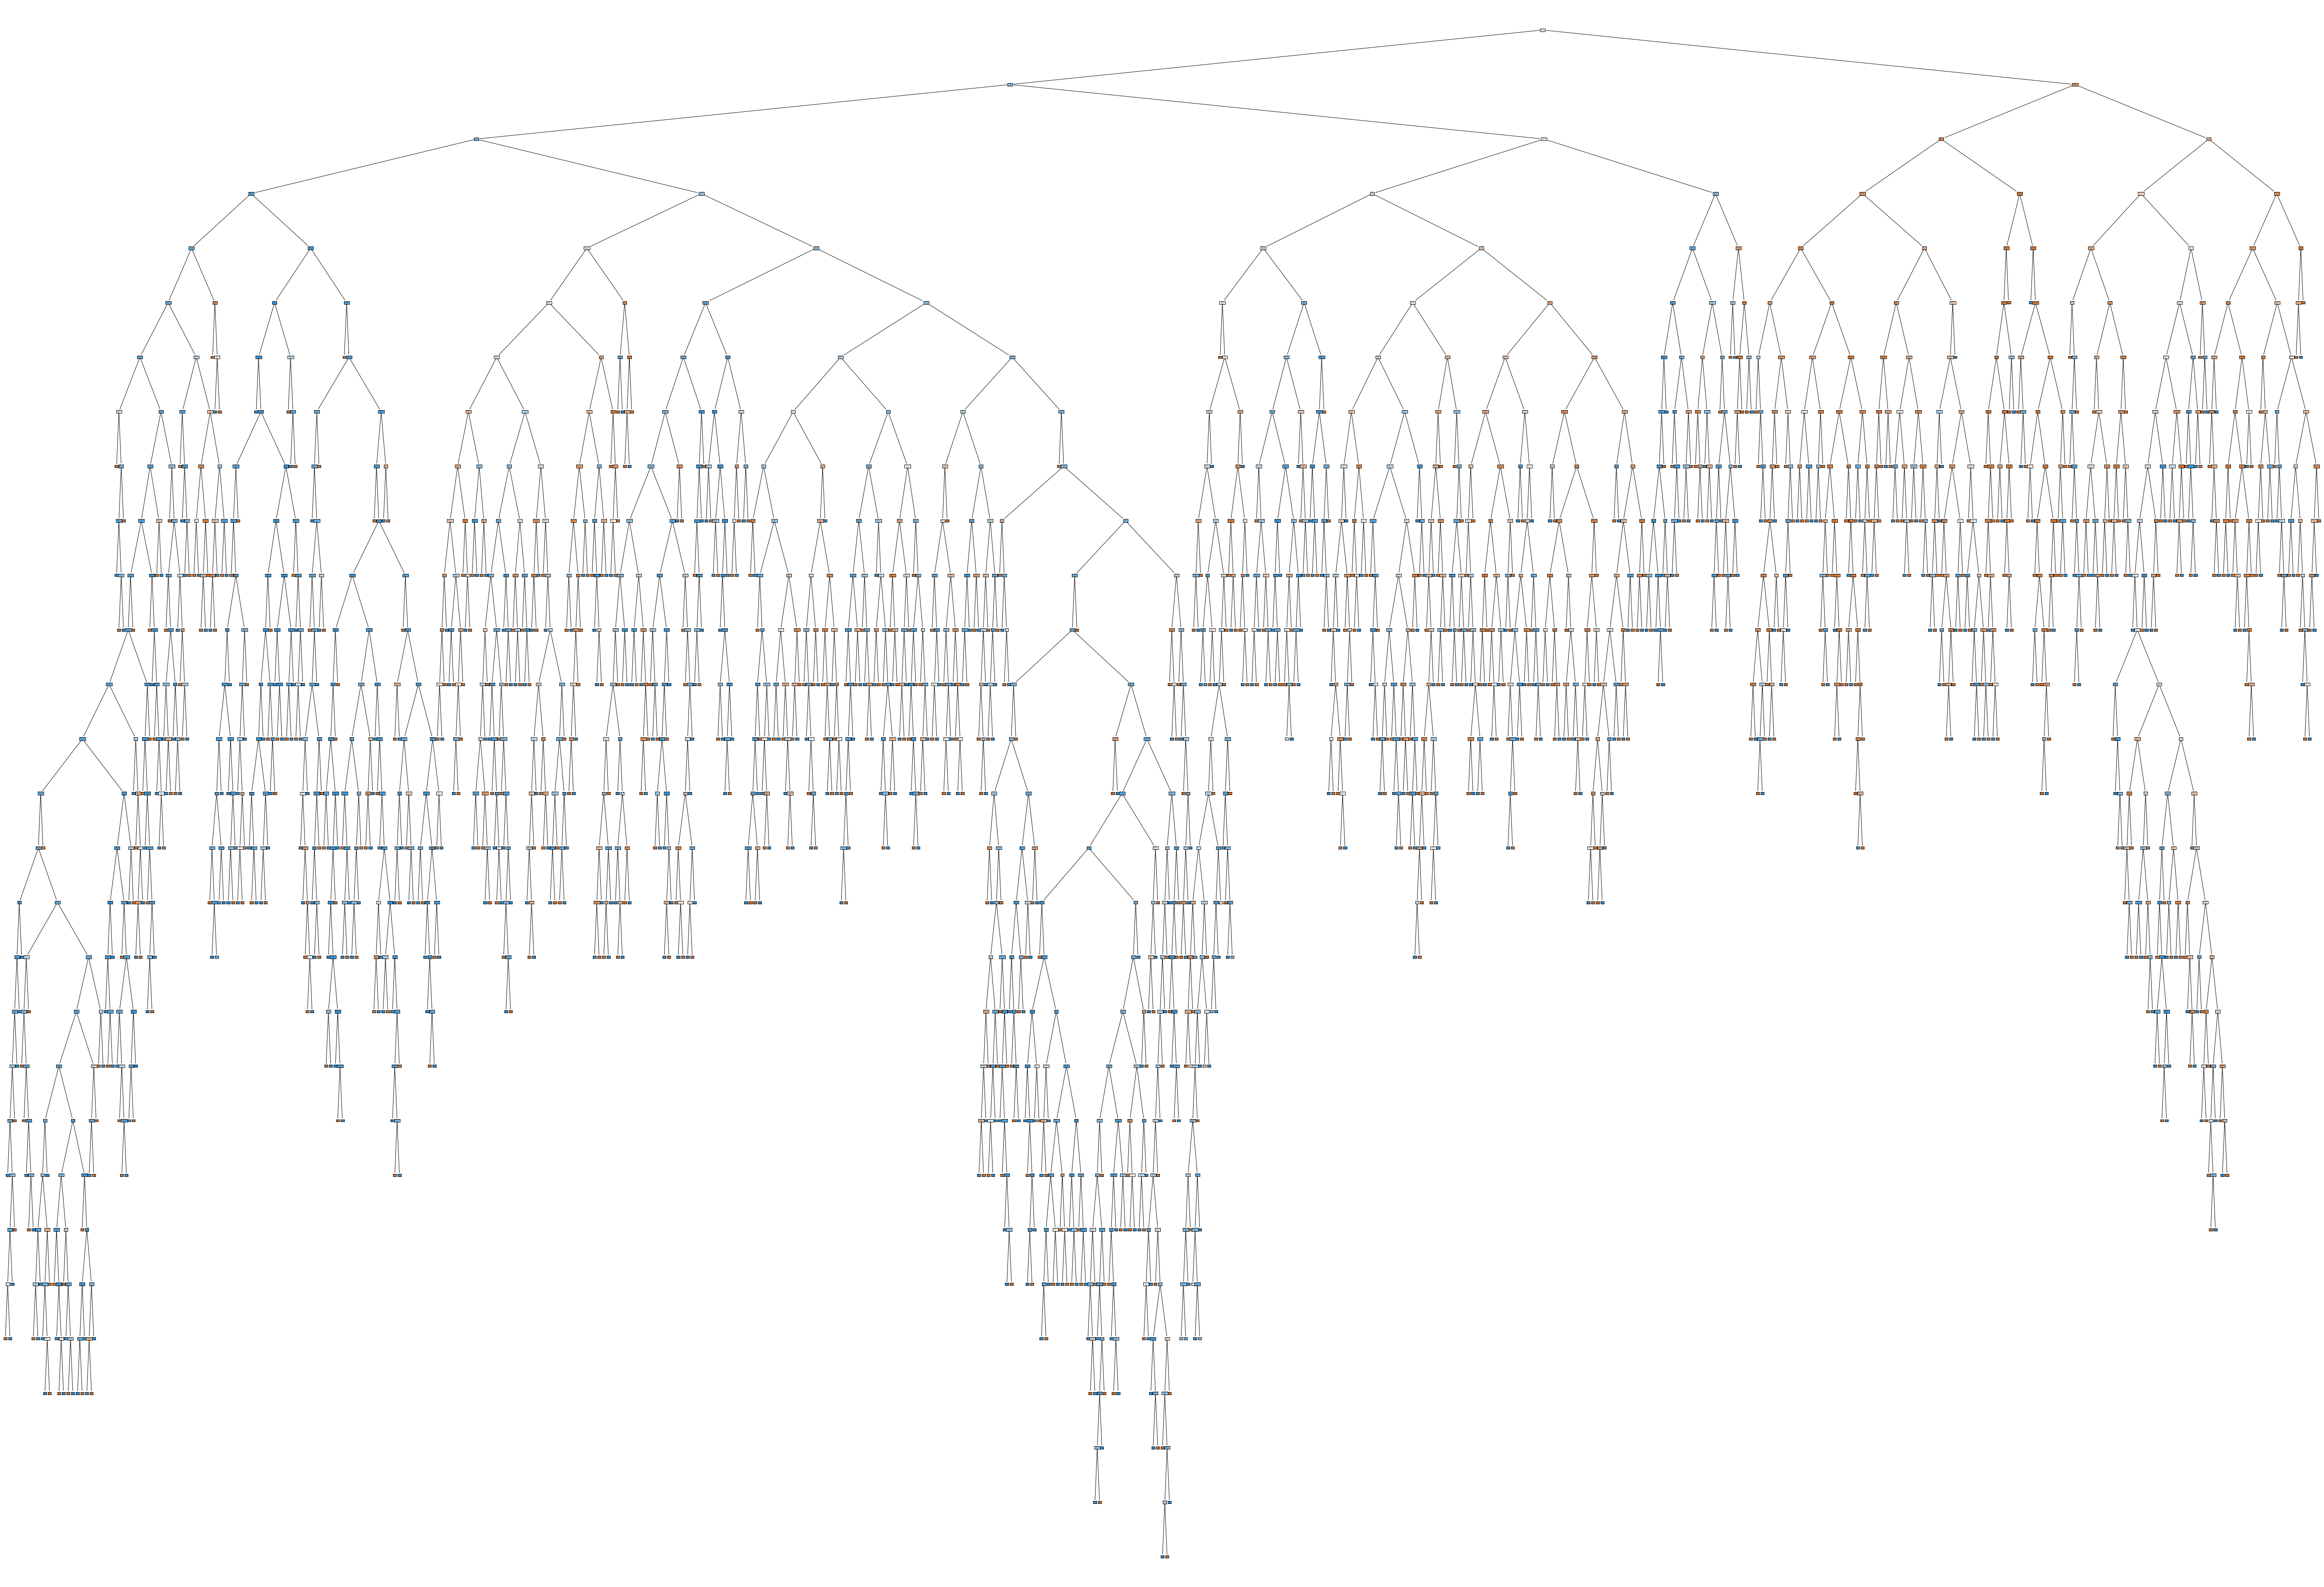

In [66]:
plt.figure(figsize=(100,70))
features = X.columns
classes = ['Yes','No']
tree.plot_tree(DTR_classifier,feature_names=features,class_names=classes,filled=True)
plt.show()

In [65]:
def Confusion_Matrix(C_M):
    sns.heatmap(C_M, cmap='coolwarm',fmt=".1f",annot=True)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels') 
    plt.title('Confusion Matrix')

In [66]:
def Evaluation_of_classifier(y_test, y_predicted):
    print('Accuracy :',100*np.round(accuracy_score(y_test, y_predicted),2),'%')
    print('Error Rate :',100-100*np.round(accuracy_score(y_test, y_predicted),2),'%')
    print('Recall or Sensitivity :',100*recall_score(y_test, y_predicted),'%')
    print('Precision :',100*precision_score(y_test, y_predicted),'%')
    print('F1 Score :',100*f1_score(y_test, y_predicted),'%')

### Evaluation of classifier

#### 1. Model evaluation on training data


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3627
           1       1.00      1.00      1.00      3616

    accuracy                           1.00      7243
   macro avg       1.00      1.00      1.00      7243
weighted avg       1.00      1.00      1.00      7243

Accuracy : 100.0 %
Error Rate : 0.0 %
Recall or Sensitivity : 99.80641592920354 %
Precision : 99.75124378109453 %
F1 Score : 99.77882222836605 %


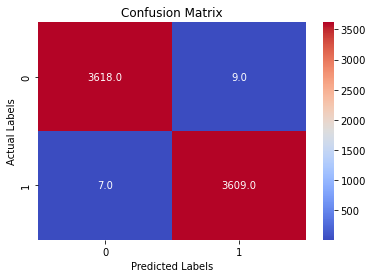

In [67]:
C_M = confusion_matrix(y_train, X_train_predicted) 
Confusion_Matrix(C_M) 
print('\nClassification Report:\n',classification_report(y_train, X_train_predicted))
Evaluation_of_classifier(y_train, X_train_predicted)

#### 2. Model evaluation on test set data


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      1547
           1       0.81      0.92      0.86      1558

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105

Accuracy : 85.0 %
Error Rate : 15.0 %
Recall or Sensitivity : 92.49037227214377 %
Precision : 80.81884464385867 %
F1 Score : 86.26159832385515 %


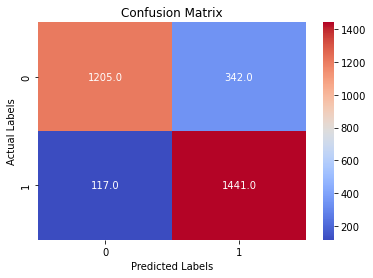

In [68]:
y_predt = DTR_classifier.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M) 
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

#### Comments :

+ So to make decision tree more simple to boost its accuracy we need to try pruning.

   ## ----> Model with Pruning :

+ Decision Tree pruning ensures trimming down a full tree to reduce the complexity and variance of the model. 
+ It fixes the problem of overfitting. 
+ It reduces the depth of the decision tree 

## *** Pre-pruning or forward pruning

+ We usually apply this technique before the construction of a decision tree
+ Stops the non-significant branches from generating
+ It uses terminating condition to stop splitting of some of the branches further 

#### Hyperparameter tuning :
  - It can be used to find best fit values for parameters like:
     + max_depth
     + max_samples_leaf
     + max_samples_split etc

- As of now we will control these parameters
     - max_depth: maximum depth of decision tree
     - min_sample_split: The minimum number of samples required to split an internal node
     - min_samples_leaf: The minimum number of samples required to be at a leaf node

#### Training model with best parameters tunned

In [69]:
parameters = {'max_depth': [40],
              'max_features':[10],
              'min_samples_leaf': [1],
              'min_samples_split':[2]}
Gscv = GridSearchCV(estimator=DTR_classifier,param_grid=parameters)
Gscv.fit(X_train,y_train)
DTR_classifier_PrePrunned = Gscv.best_estimator_

In [70]:
DTR_classifier_PrePrunned

DecisionTreeClassifier(max_depth=40, max_features=10)

#### Visualizing Decision Tree after pre-pruning

In [71]:
plt.figure(figsize=(100,70))
features = X.columns
classes = ['Yes','No']
tree.plot_tree(DTR_classifier_PrePrunned,feature_names=features,class_names=classes,filled=True)
plt.show()

#### After pre - prunning : Improved accuracy on test data


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      1547
           1       0.81      0.92      0.86      1558

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105

Accuracy : 85.0 %
Error Rate : 15.0 %
Recall or Sensitivity : 91.91270860077022 %
Precision : 80.63063063063063 %
F1 Score : 85.90281943611276 %


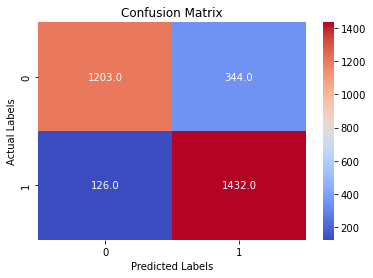

In [72]:
y_predt = DTR_classifier_PrePrunned.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)   
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

## *** Post - prunning or backward pruning

+ It is the process where the decision tree is generated first and then the non-significant branches are removed. 
+ We use this technique after the construction of the decision tree. 
+ It is used when decision tree has very large or infinite depth and shows overfitting of the model. 

#### Cost complexity pruning technique : 
+ The cost complexity parameter, ccp_alpha parameterizes by giving minimum leaf value of decision tree 
+ Each ccp_alpha will create different classifiers and choose the best out of it
+ More number of nodes are pruned with greater values of ccp_alpha

+ Extracting ccp_alpha and impurities from classifier using function cost_complexity_pruning_path()

In [73]:
Path = DTR_classifier.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities = Path.ccp_alphas,Path.impurities
print('ccp_alphas:\n',ccp_alphas)
print('\n\nImpurities:\n',impurities)

ccp_alphas:
 [0.00000000e+00 3.28724614e-06 1.84085784e-05 1.97234769e-05
 2.09188391e-05 2.30107230e-05 2.95852153e-05 3.61597076e-05
 3.83512050e-05 4.60214460e-05 4.73363445e-05 5.25959383e-05
 6.62722885e-05 6.80317028e-05 6.83348744e-05 8.28386028e-05
 8.76598971e-05 8.78591242e-05 8.82077715e-05 8.86338960e-05
 8.96828178e-05 8.99974944e-05 9.06268475e-05 9.07279935e-05
 9.13209870e-05 9.20428920e-05 9.20428920e-05 1.03548253e-04
 1.03548253e-04 1.03548253e-04 1.03548253e-04 1.05849326e-04
 1.07582601e-04 1.08906695e-04 1.10451470e-04 1.10451470e-04
 1.10451470e-04 1.10451470e-04 1.15053615e-04 1.15053615e-04
 1.18340861e-04 1.18340861e-04 1.18340861e-04 1.18340861e-04
 1.18340861e-04 1.18340861e-04 1.18340861e-04 1.18340861e-04
 1.18340861e-04 1.18340861e-04 1.20806296e-04 1.20806296e-04
 1.22723856e-04 1.22723856e-04 1.22723856e-04 1.23531250e-04
 1.24257904e-04 1.24257904e-04 1.24257904e-04 1.24257904e-04
 1.24257904e-04 1.25513035e-04 1.25513035e-04 1.25513035e-04
 1.25513035

#### Trend between total impurity vs effective alpha for training set
+ The last value in ccp_alphas or the maximum effective alpha value is removed
+ Because it is the trivial tree with only one node.
+ Now we need to train a decision tree using the effective alphas.

Text(0.5, 1.0, 'Total impurity vs effective alpha for training set')

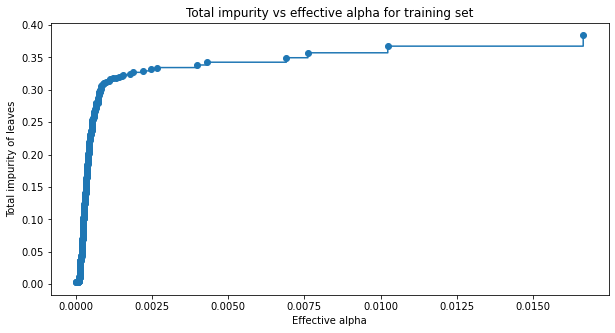

In [74]:
plt.figure(figsize=(10,5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total impurity vs effective alpha for training set")

+ We can see that as the value of the effective alpha increases total impurities in the leaves increases

#### Appending models corresponding to each alpha in a list

In [75]:
classifiers = []
for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(min_samples_leaf=1,
                                        min_samples_split=2,
                                        max_depth=40,
                                        max_features=10,
                                        ccp_alpha=ccp_alpha)
    classifier.fit(X_train,y_train)
    classifiers.append(classifier)

In [76]:
classifiers

[DecisionTreeClassifier(max_depth=40, max_features=10),
 DecisionTreeClassifier(ccp_alpha=3.287246142416654e-06, max_depth=40,
                        max_features=10),
 DecisionTreeClassifier(ccp_alpha=1.8408578397533296e-05, max_depth=40,
                        max_features=10),
 DecisionTreeClassifier(ccp_alpha=1.9723476854499925e-05, max_depth=40,
                        max_features=10),
 DecisionTreeClassifier(ccp_alpha=2.0918839088105996e-05, max_depth=40,
                        max_features=10),
 DecisionTreeClassifier(ccp_alpha=2.301072299691658e-05, max_depth=40,
                        max_features=10),
 DecisionTreeClassifier(ccp_alpha=2.9585215281749915e-05, max_depth=40,
                        max_features=10),
 DecisionTreeClassifier(ccp_alpha=3.615970756658317e-05, max_depth=40,
                        max_features=10),
 DecisionTreeClassifier(ccp_alpha=3.83512049948609e-05, max_depth=40,
                        max_features=10),
 DecisionTreeClassifier(ccp_alpha=4.6

#### Trend between depth of the tree and the ccp_alpha

Text(0.5, 1.0, 'Depth vs alpha')

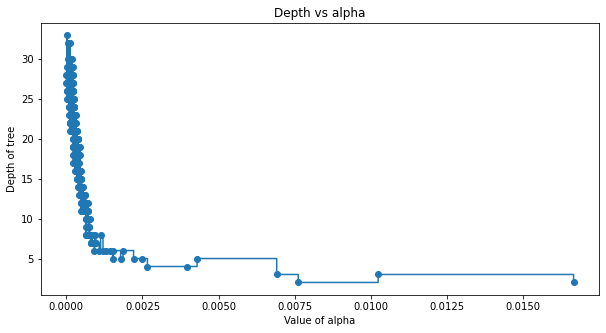

In [77]:
depth = [classifier.tree_.max_depth for classifier in classifiers[:-1]]

plt.figure(figsize=(10,5))
plt.plot(ccp_alphas[:-1], depth, marker="o", drawstyle="steps-post")
plt.xlabel("Value of alpha")
plt.ylabel("Depth of tree")
plt.title("Depth vs alpha")

+ We can see as the value of alpha increases the depth of tree decreases

#### Trend between number of nodes of the tree and the ccp_alpha

Text(0.5, 1.0, 'Number of nodes vs alpha')

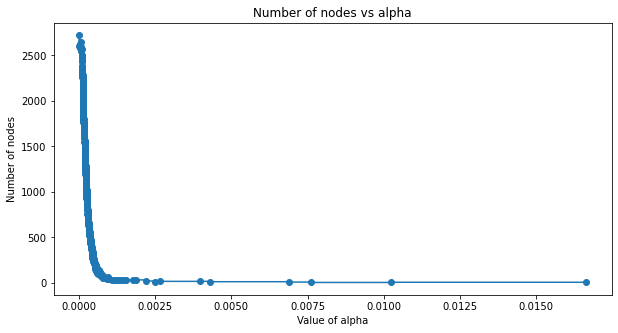

In [78]:
node_counts = [classifier.tree_.node_count for classifier in classifiers[:-1]]

plt.figure(figsize=(10,5))
plt.plot(ccp_alphas[:-1], node_counts, marker="o", drawstyle="steps-post")
plt.xlabel("Value of alpha")
plt.ylabel("Number of nodes")
plt.title("Number of nodes vs alpha")

+ As the value of alpha increases the number of nodes decreases as the depth of tree also decreases

#### Trend between accuracy of models and the ccp_alpha
+ To find the value of alpha for which maximum training and test accuracy is found

In [79]:
train_accuracy = []
test_accuracy = []
for c in classifiers:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

Text(0.5, 1.0, 'Accuarcy vs alpha')

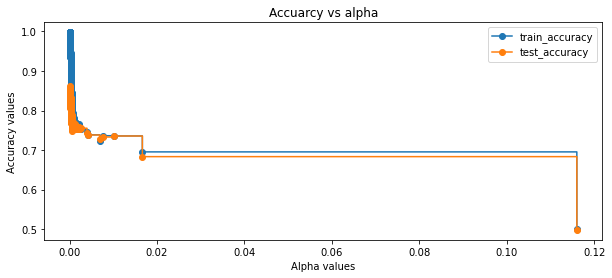

In [80]:
plt.figure(figsize=(10,4))
plt.plot(ccp_alphas,train_accuracy,label = 'train_accuracy',marker="o",drawstyle='steps-post')
plt.plot(ccp_alphas,test_accuracy,label = 'test_accuracy',marker="o",drawstyle='steps-post')
plt.xlabel('Alpha values')
plt.ylabel('Accuracy values')
plt.legend()
plt.title('Accuarcy vs alpha')

#### Training the model using the best ccp_alpha value

In [81]:
Dclf_final = DecisionTreeClassifier(random_state=0,ccp_alpha=0)
Dclf_final.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0, random_state=0)

#### Visualizing Decision Tree after post-pruning

In [82]:
# plt.figure(figsize=(100,70))
# features = X.columns
# classes = ['Yes','No']
# tree.plot_tree(Dclf_final,feature_names=features,class_names=classes,filled=True)
# plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      1547
           1       0.81      0.92      0.86      1558

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105

Accuracy : 85.0 %
Error Rate : 15.0 %
Recall or Sensitivity : 92.16944801026958 %
Precision : 80.90140845070422 %
F1 Score : 86.16861686168617 %


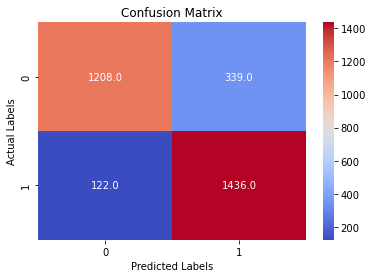

In [83]:
y_predt = Dclf_final.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

# 2. The Random Forest Classification

### ----> Model with default parameters in the random forest

In [84]:
RF_Model = RandomForestClassifier()
print('Default parameters :')
pprint(RF_Model.get_params())

Default parameters :
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [85]:
RF_Model.fit(X_train,y_train)

RandomForestClassifier()


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1547
           1       0.85      0.92      0.88      1558

    accuracy                           0.88      3105
   macro avg       0.88      0.88      0.88      3105
weighted avg       0.88      0.88      0.88      3105

Accuracy : 88.0 %
Error Rate : 12.0 %
Recall or Sensitivity : 92.49037227214377 %
Precision : 84.56572769953051 %
F1 Score : 88.3507050889025 %


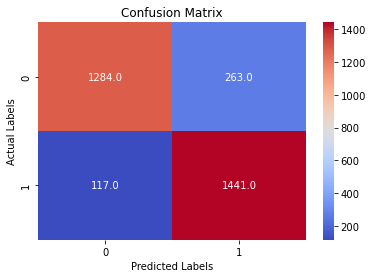

In [86]:
y_predt = RF_Model.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)  
print('\nClassification Report:\n',classification_report(y_test,y_predt)) 

Evaluation_of_classifier(y_test, y_predt)

## ----> Model with hyper - parameter tuning

+ Best parameters to be adjusted :
   - n_estimators = number of trees in the foreset
   - max_features = max number of features considered for splitting a node
   - max_depth = max number of levels in each decision tree
   - min_samples_split = min number of data points placed in a node before the node is split
   - min_samples_leaf = min number of data points allowed in a leaf node
   - bootstrap = method for sampling data points (with or without replacement)

### 1. ----> Tunning hyperparameter with the RandomSearchCV 
+ To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting.
+ Randomly sample from the grid, performing K-Fold CV with each combination of values.

In [87]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


+ On each iteration, the algorithm will choose a different combination of the features. 
+ There are 2x12x2x3x3x10 = 4320 settings

#### Random Search Training the model :

In [88]:
RF_Hyper = RandomForestClassifier()                  # Create the base model to tune

RF_Hyperp = RandomizedSearchCV(estimator = RF_Hyper, 
                               param_distributions = random_grid, 
                               n_iter = 10,    # search across 10 different combinations, and use all available cores
                               cv = 3,         # Random search of parameters, using 3 fold cross validation
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
RF_Hyperp.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [89]:
RF_Hyperp.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

#### Evaluate the model


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1547
           1       0.85      0.92      0.88      1558

    accuracy                           0.88      3105
   macro avg       0.88      0.87      0.87      3105
weighted avg       0.88      0.88      0.87      3105

Accuracy : 88.0 %
Error Rate : 12.0 %
Recall or Sensitivity : 91.84852374839538 %
Precision : 84.57446808510637 %
F1 Score : 88.06153846153848 %


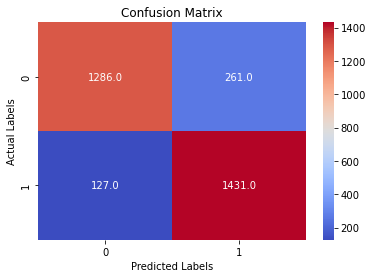

In [90]:
y_predt = RF_Hyperp.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)
print('\nClassification Report:\n',classification_report(y_test,y_predt))  

Evaluation_of_classifier(y_test, y_predt)

### 2.----> Tunning hyperparameter with the GridSearchCV 

+ Random search allow us to narrow down the range for each hyperparameter. 
+ GridSearchCV evaluates all combinations. 
+ To use Grid Search make grid based on the best values provided by random search.

In [91]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [600],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['auto'],
    'max_depth': [80]}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_RF = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1, 
                           verbose = 2)

#### Best Hyper parameters

In [92]:
grid_search_RF.fit(X_train, y_train)
grid_search_RF.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

#### Evaluate the model


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.84      1547
           1       0.82      0.91      0.86      1558

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105

Accuracy : 85.0 %
Error Rate : 15.0 %
Recall or Sensitivity : 90.7573812580231 %
Precision : 81.97101449275362 %
F1 Score : 86.1407249466951 %


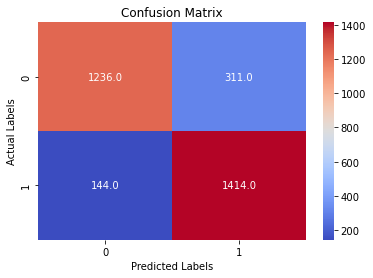

In [93]:
y_predt = grid_search_RF.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)  
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

# 3. Naive Bayes

### ----> Model with default parameter

In [94]:
model_NB = GaussianNB()
y_pred = model_NB.fit(X_train, y_train).predict(X_test)

#### Model evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74      1547
           1       0.73      0.81      0.77      1558

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.75      3105
weighted avg       0.76      0.75      0.75      3105

Accuracy : 75.0 %
Error Rate : 25.0 %
Recall or Sensitivity : 81.12965340179717 %
Precision : 73.0213749277874 %
F1 Score : 76.86226816661599 %


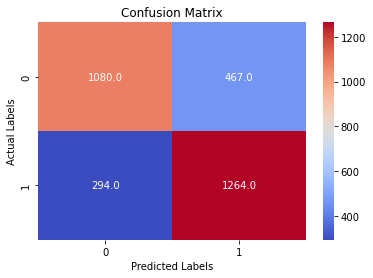

In [95]:
y_predt = model_NB.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

### Accuracy using ROC Curve Visualization

In [96]:
def ROC_Curve(Model):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    
    logit_roc_auc = roc_auc_score(y_test, Model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, Model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

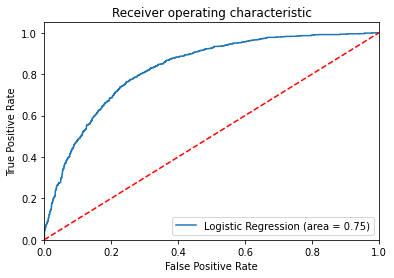

In [97]:
ROC_Curve(model_NB)

### ----> Model with hyper parameter tuning

In [98]:
cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=10, 
                                    random_state=0)

In [99]:
params_NB = {'var_smoothing': np.logspace(0,-1, num=100)}

gs_NB = GridSearchCV(estimator=model_NB, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_train)
gs_NB.fit(X_train,y_train);

Fitting 100 folds for each of 100 candidates, totalling 10000 fits


In [100]:
gs_NB.best_params_

{'var_smoothing': 0.11233240329780271}

In [101]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

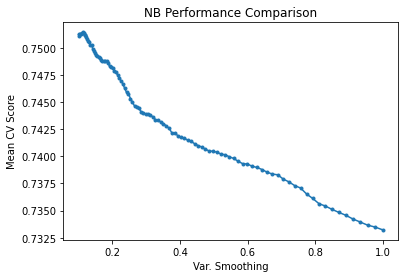

In [102]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

#### Model Evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.66      0.72      1547
           1       0.71      0.84      0.77      1558

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.75      3105
weighted avg       0.76      0.75      0.75      3105

Accuracy : 75.0 %
Error Rate : 25.0 %
Recall or Sensitivity : 83.7612323491656 %
Precision : 71.15594329334787 %
F1 Score : 76.94575471698111 %


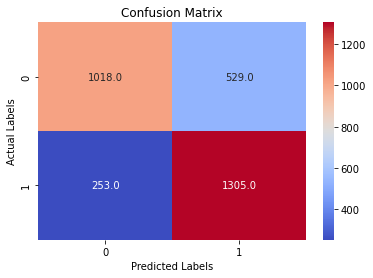

In [103]:
y_predt = gs_NB.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

### Accuracy using ROC Curve Visualization

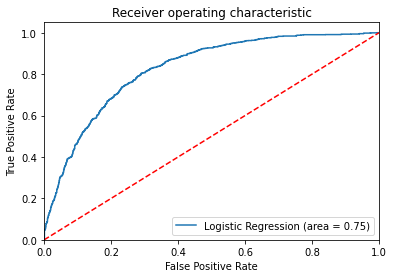

In [104]:
ROC_Curve(gs_NB)

# 4. The Kernel SVM

## ----> Model without hyperparameter tuning

In [105]:
model_svm = SVC()
model_svm.fit(X_train,y_train)

SVC()

#### Model evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75      1547
           1       0.74      0.82      0.78      1558

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105

Accuracy : 77.0 %
Error Rate : 23.0 %
Recall or Sensitivity : 82.28498074454428 %
Precision : 74.31884057971014 %
F1 Score : 78.09929942126104 %


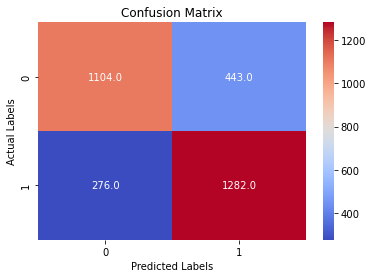

In [106]:
y_predt = model_svm.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M) 
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

## ----> Model with the hyperparameter tuning

In [107]:
svm1 = SVC()
param_grid = {'C': [100],
              'gamma': [1],
              'kernel': ['rbf','linear']}
model_svm_hyper = GridSearchCV(svm1,param_grid)
model_svm_hyper.fit(X_train,y_train)
model_svm_hyper.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [108]:
model_svm_hyper.best_estimator_.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Model evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      1547
           1       0.84      0.89      0.87      1558

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105

Accuracy : 86.0 %
Error Rate : 14.0 %
Recall or Sensitivity : 89.28112965340179 %
Precision : 83.94689197344599 %
F1 Score : 86.53188180404354 %


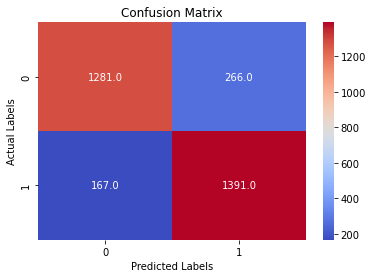

In [109]:
y_predt = model_svm_hyper.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M) 
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

# 5. The Logistic Regression

## ----> Model with default parameters

In [110]:
Model_LG = LogisticRegression()
Model_LG.fit(X_train,y_train)

LogisticRegression()

#### Model evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      1547
           1       0.74      0.81      0.77      1558

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105

Accuracy : 76.0 %
Error Rate : 24.0 %
Recall or Sensitivity : 80.61617458279846 %
Precision : 74.01296405421331 %
F1 Score : 77.17357910906298 %


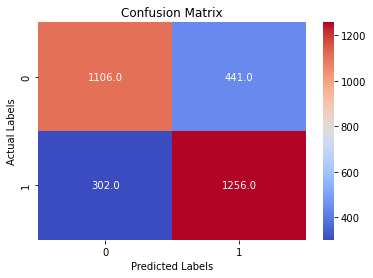

In [111]:
y_predt = Model_LG.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M) 
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

### Accuracy using ROC Curve Visualization

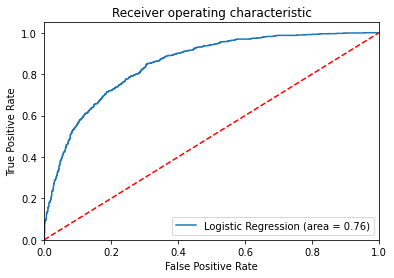

In [112]:
ROC_Curve(Model_LG)

## ----> Model with the hyperparameter tuning

In [113]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [8, 10,25, 50]
    }
]

Model_LG_hyper = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
Model_LG_hyper.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [8, 10, 25, 50],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [114]:
Model_LG_hyper.best_estimator_

LogisticRegression(C=0.012742749857031334, max_iter=8, penalty='none',
                   solver='sag')

#### Model evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      1547
           1       0.74      0.82      0.78      1558

    accuracy                           0.76      3105
   macro avg       0.77      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105

Accuracy : 76.0 %
Error Rate : 24.0 %
Recall or Sensitivity : 81.57894736842105 %
Precision : 74.06759906759906 %
F1 Score : 77.64202810018325 %


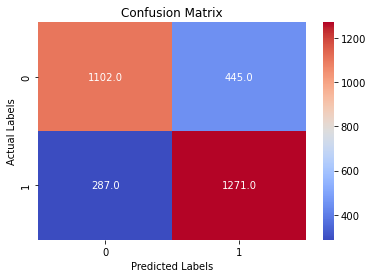

In [115]:
y_predt = Model_LG_hyper.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

### Accuracy using ROC Curve Visualization

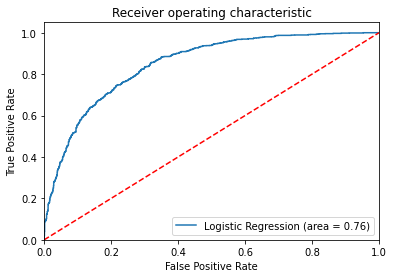

In [116]:
ROC_Curve(Model_LG_hyper)

# 6. The K Nearest Neighbour


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      1547
           1       0.75      0.76      0.76      1558

    accuracy                           0.75      3105
   macro avg       0.75      0.75      0.75      3105
weighted avg       0.75      0.75      0.75      3105

Accuracy : 75.0 %
Error Rate : 25.0 %
Recall or Sensitivity : 75.67394094993581 %
Precision : 75.33546325878594 %
F1 Score : 75.5043227665706 %


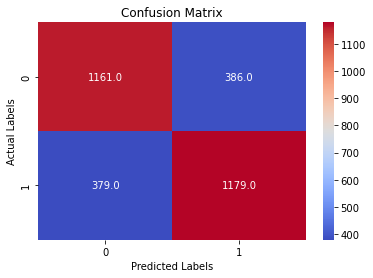

In [117]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
KNN_Model.fit(X_train,y_train)

y_predt = KNN_Model.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">7. Ensemble Technique </p>
+ To boost the model accuracy
+ It helps improve results by combining several models to improve predictive performance compared to a single model 

# 1. Max Voting Classifier 

+ The idea is instead of creating separate dedicated models and finding the accuracy for each them
+ we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

#### Ensemble of Models 

In [118]:
estimator = [] 
estimator.append(('Decision Tree  Classifier', DTR_classifier)) 
estimator.append(('Random Forest Classifier', RF_Model)) 
estimator.append(('Naive Bayes Classifier', model_NB))
estimator.append(('SVM Classifier', model_svm))
estimator.append(('Logistic Regression Classifier', Model_LG))
estimator

[('Decision Tree  Classifier', DecisionTreeClassifier()),
 ('Random Forest Classifier', RandomForestClassifier()),
 ('Naive Bayes Classifier', GaussianNB()),
 ('SVM Classifier', SVC()),
 ('Logistic Regression Classifier', LogisticRegression())]

### *** Hard Voting : 
  + In hard voting, the predicted output class is a class with the highest majority of votes
  + The class which had the highest probability of being predicted by each of the classifiers. 
  + Suppose five classifiers predicted the output class(A, A, A, A, B), so here the majority predicted A as output.

In [119]:
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train)  

VotingClassifier(estimators=[('Decision Tree  Classifier',
                              DecisionTreeClassifier()),
                             ('Random Forest Classifier',
                              RandomForestClassifier()),
                             ('Naive Bayes Classifier', GaussianNB()),
                             ('SVM Classifier', SVC()),
                             ('Logistic Regression Classifier',
                              LogisticRegression())])

#### Model evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      1547
           1       0.77      0.85      0.81      1558

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105

Accuracy : 80.0 %
Error Rate : 20.0 %
Recall or Sensitivity : 85.49422336328625 %
Precision : 76.55172413793103 %
F1 Score : 80.77622801697999 %


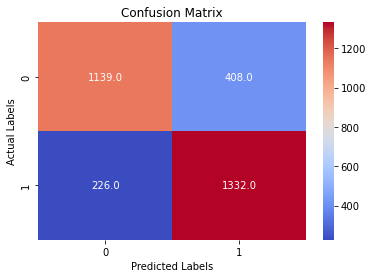

In [120]:
y_predt = hard_voting.predict(X_test)
C_M = confusion_matrix(y_test, y_predt) 
Confusion_Matrix(C_M)
print('\nClassification Report:\n',classification_report(y_test,y_predt))
Evaluation_of_classifier(y_test, y_predt)

# 2. Boosting
+ The main idea of boosting is to add additional models to the overall ensemble model sequentially. 
+ Previously with bagging, we averaged each individual model created. 
+ This time with each iteration of boosting, a new model is created and the new base-learner model is trained (updated) from the errors of the previous learners.
+ The gradient descent optimization occurs on the output of the varies models, and not their individual parameters.
+ Each new subset which is iterated upon contains elements which could have been misclassified by previous models. 
+ AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. 
+ Multiple sequential models are created, each correcting the errors from the last model. 
+ AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

### Steps :
* Initially, all observations in the dataset are given equal weights.
* A model is built on a subset of data.
* Using this model, predictions are made on the whole dataset.
* Errors are calculated by comparing the predictions and actual values.
* While creating the next model, higher weights are given to the data points which were predicted incorrectly.
* Weights can be determined using the error value. For instance, higher the error more is the weight assigned to the observation.
* This process is repeated until the error function does not change, or the maximum limit of the number of estimators is reached.

# ----> Adda Boost

In [121]:
ada_boost = AdaBoostClassifier(learning_rate=1,n_estimators=10000)
ada_boost.fit(X_train, y_train)
ada_boost.score(X_test,y_test)

0.7874396135265701

# ----> Gradient Boosting   
+ It uses the boosting technique, combining a number of weak learners to form a strong learner. 
+ Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

In [122]:
grad_boost = GradientBoostingClassifier(learning_rate=1,n_estimators=10000)
grad_boost.fit(X_train, y_train)
grad_boost.score(X_test,y_test)

0.8689210950080515

# ----> XG Boost
+ XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. 
+ It has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. 
+ XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. 
+ It also includes a variety of regularization which reduces overfitting and improves overall performance. 
+ Hence it is also known as regularized boosting technique.

### Parameters :
+ min_samples_split :
  * Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
  * Used to control over-fitting. 
  * Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
 
+ min_samples_leaf :
  * Defines the minimum samples required in a terminal or leaf node.
  * Generally, lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in the majority will be very small.
+ min_weight_fraction_leaf :
  * Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
+ max_depth :
  * The maximum depth of a tree.
  * Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
  * Should be tuned using CV.
+ max_leaf_nodes :
  * The maximum number of terminal nodes or leaves in a tree.
  * Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
  * If this is defined, GBM will ignore max_depth.

+ max_features :
  * The number of features to consider while searching for the best split. These will be randomly selected.
  * As a thumb-rule, the square root of the total number of features works great but we should check up to 30-40% of the total number of features.
  * Higher values can lead to over-fitting but it generally depends on a case to case scenario.

In [123]:
xgb_boost = xgb.XGBClassifier(learning_rate=1,n_estimators=10000)
xgb_boost.fit(X_train, y_train)
xgb_boost.score(X_test,y_test)

[17:56:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8631239935587761

In [124]:
eclf = VotingClassifier(estimators=[('Ada Boost', ada_boost), 
                                    ('Grad Boost', grad_boost), 
                                    ('XG Boost', xgb_boost)], 
                        voting='hard')
clf = [DTR_classifier, RF_Model, model_NB,model_svm, Model_LG]
for clf, label in zip([DTR_classifier, RF_Model, model_NB,model_svm, Model_LG], ['Ada Boost','Grad Boost','XG Boost','Ensemble']):
    scores = cross_val_score(clf, Data_featuresf,Target_Varf, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.73 (+/- 0.01) [Ada Boost]
Accuracy: 0.79 (+/- 0.02) [Grad Boost]
Accuracy: 0.75 (+/- 0.01) [XG Boost]
Accuracy: 0.79 (+/- 0.01) [Ensemble]


# 3. Bagging 
+ Bagging is shorthand for the combination of bootstrapping and aggregating. 
+ Bootstrapping is a method to help decrease the variance of the classifier and reduce overfitting, by resampling data from the training set with the same cardinality as the original set. 
+ The model created should be less overfitted than a single individual model.
+ Bagging is an effective method when limited data, and by using samples able to get an estimate by aggregating the scores over many samples.

+ Once the bagging is done, and all the models have been created on (mostly) different data, a weighted average is then used to determine the final score.
+ Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.
#### Steps:
  - Step 1: Multiple subsets are created from the original dataset, selecting observations with replacement.
  - Step 2: A base model (weak model) is created on each of these subsets.
  - Step 3: The models run in parallel and are independent of each other.
  - Step 4: The final predictions are determined by combining the predictions from all the models.

In [125]:
clf_array = [DTR_classifier, RF_Model, model_NB,model_svm, Model_LG]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, Data_featuresf,Target_Varf, cv=10, n_jobs=-1)
    bagging_clf    = BaggingClassifier(clf,max_samples=0.4, max_features=3, random_state=0)
    bagging_scores = cross_val_score(bagging_clf, Data_featuresf,Target_Varf, cv=10,n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.728, std: (+/-) 0.008 [DecisionTreeClassifier]
Mean of: 0.763, std: (+/-) 0.009 [Bagging DecisionTreeClassifier]

Mean of: 0.792, std: (+/-) 0.016 [RandomForestClassifier]
Mean of: 0.767, std: (+/-) 0.007 [Bagging RandomForestClassifier]

Mean of: 0.752, std: (+/-) 0.010 [GaussianNB]
Mean of: 0.766, std: (+/-) 0.008 [Bagging GaussianNB]

Mean of: 0.792, std: (+/-) 0.013 [SVC]
Mean of: 0.735, std: (+/-) 0.000 [Bagging SVC]

Mean of: 0.803, std: (+/-) 0.012 [LogisticRegression]
Mean of: 0.735, std: (+/-) 0.000 [Bagging LogisticRegression]



In [126]:
clf = [DTR_classifier, RF_Model, model_NB,model_svm, Model_LG]
eclf = VotingClassifier(estimators=[('Decision Tree  Classifier', DTR_classifier),
                                    ('Random Forest Classifier', RF_Model),
                                    ('Naive Bayes Classifier', model_NB),
                                    ('SVM Classifier', model_svm),
                                    ('Logistic Regression Classifier', Model_LG)],
                        voting='hard')
for clf, label in zip([DTR_classifier, RF_Model, model_NB,model_svm, Model_LG],
                      ['Decision Tree  Classifier',
                       'Random Forest Classifier',
                       'Naive Bayes Classifier',
                       'SVM Classifier',
                       'Logistic Regression Classifier']):
    scores = cross_val_score(clf, Data_featuresf,Target_Varf, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.73 (+/- 0.01) [Decision Tree  Classifier]
Accuracy: 0.79 (+/- 0.02) [Random Forest Classifier]
Accuracy: 0.75 (+/- 0.01) [Naive Bayes Classifier]
Accuracy: 0.79 (+/- 0.01) [SVM Classifier]
Accuracy: 0.80 (+/- 0.01) [Logistic Regression Classifier]


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">8. Comparision of accuracies of different models </p>

Text(0.5, 1.0, 'Histogram plot of accuracy vs models')

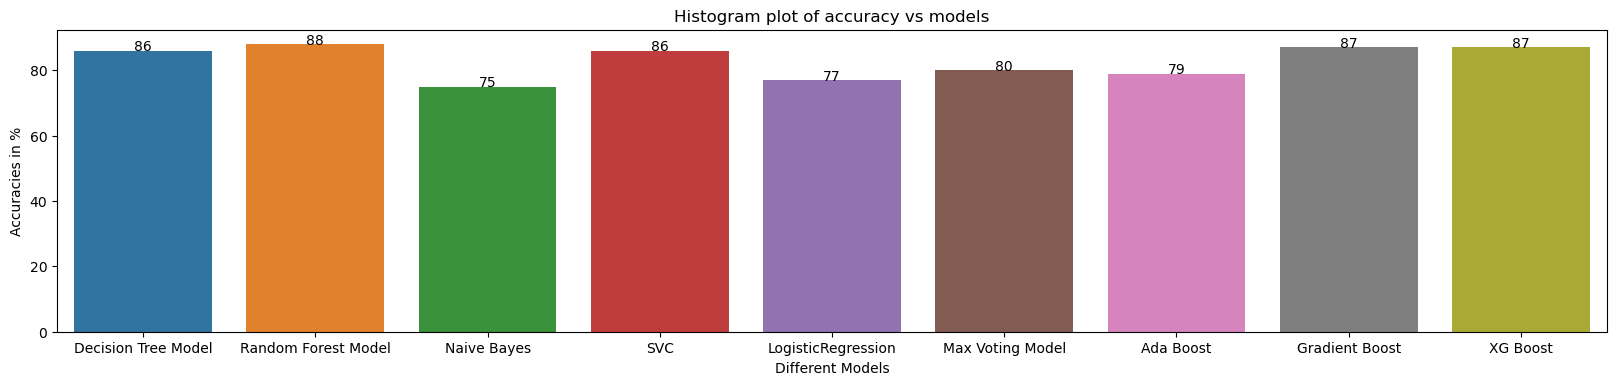

In [127]:
Models   = ['Decision Tree Model','Random Forest Model','Naive Bayes','SVC','LogisticRegression',
            'Max Voting Model','Ada Boost','Gradient Boost','XG Boost']
Accuracy = [86,88,75,86,77,80,79,87,87]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
        
plt.figure(figsize=(20,4),dpi=100)
sns.barplot(Models,Accuracy)
addlabels(Models,Accuracy)
plt.xlabel('Different Models')
plt.ylabel('Accuracies in %')
plt.title(f'Histogram plot of accuracy vs models')

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> The End </p>